# Data mining Project - 95-791 Data Mining (Fall 2022)
## Names: Faizan Khan, Oscar David Benavides Millan,Seemal Muzaffar



### Loading packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn import preprocessing
from sklearn import neighbors
from sklearn.metrics import r2_score 
import time

%matplotlib inline
plt.style.use('seaborn-white')

# Reading and Cleaning dataset - First Dataset

In [2]:
#Load the dataset to get the information for airline customer satisfaction
#create a dataframe called airplane_satisfaction with the Invistico_Airline.csv information
airplane_satisfaction = pd.read_csv("Invistico_Airline.csv")
airplane_satisfaction.head(5)

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


In [3]:
#Explore if the dataset has NAs
print("Original data set \n")
print(airplane_satisfaction.isnull().sum(axis=0))
#Drop the rows with missing values
airplane_satisfaction = airplane_satisfaction.dropna()
print("\n \n Modified data set \n")
print(airplane_satisfaction.isnull().sum(axis=0))

Original data set 

satisfaction                           0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

 
 Modified data set 



In [4]:
#get the frequency of each class by the satisfaction variable
airplane_satisfaction['satisfaction'].value_counts()

satisfied       70882
dissatisfied    58605
Name: satisfaction, dtype: int64

In [5]:
#get the set description to validate data types per feature
airplane_satisfaction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129487 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129487 non-null  object 
 1   Gender                             129487 non-null  object 
 2   Customer Type                      129487 non-null  object 
 3   Age                                129487 non-null  int64  
 4   Type of Travel                     129487 non-null  object 
 5   Class                              129487 non-null  object 
 6   Flight Distance                    129487 non-null  int64  
 7   Seat comfort                       129487 non-null  int64  
 8   Departure/Arrival time convenient  129487 non-null  int64  
 9   Food and drink                     129487 non-null  int64  
 10  Gate location                      129487 non-null  int64  
 11  Inflight wifi service              1294

## Data Visualization

Text(0.5, 0.98, 'Histogram for Column Variables with Star Ratings')

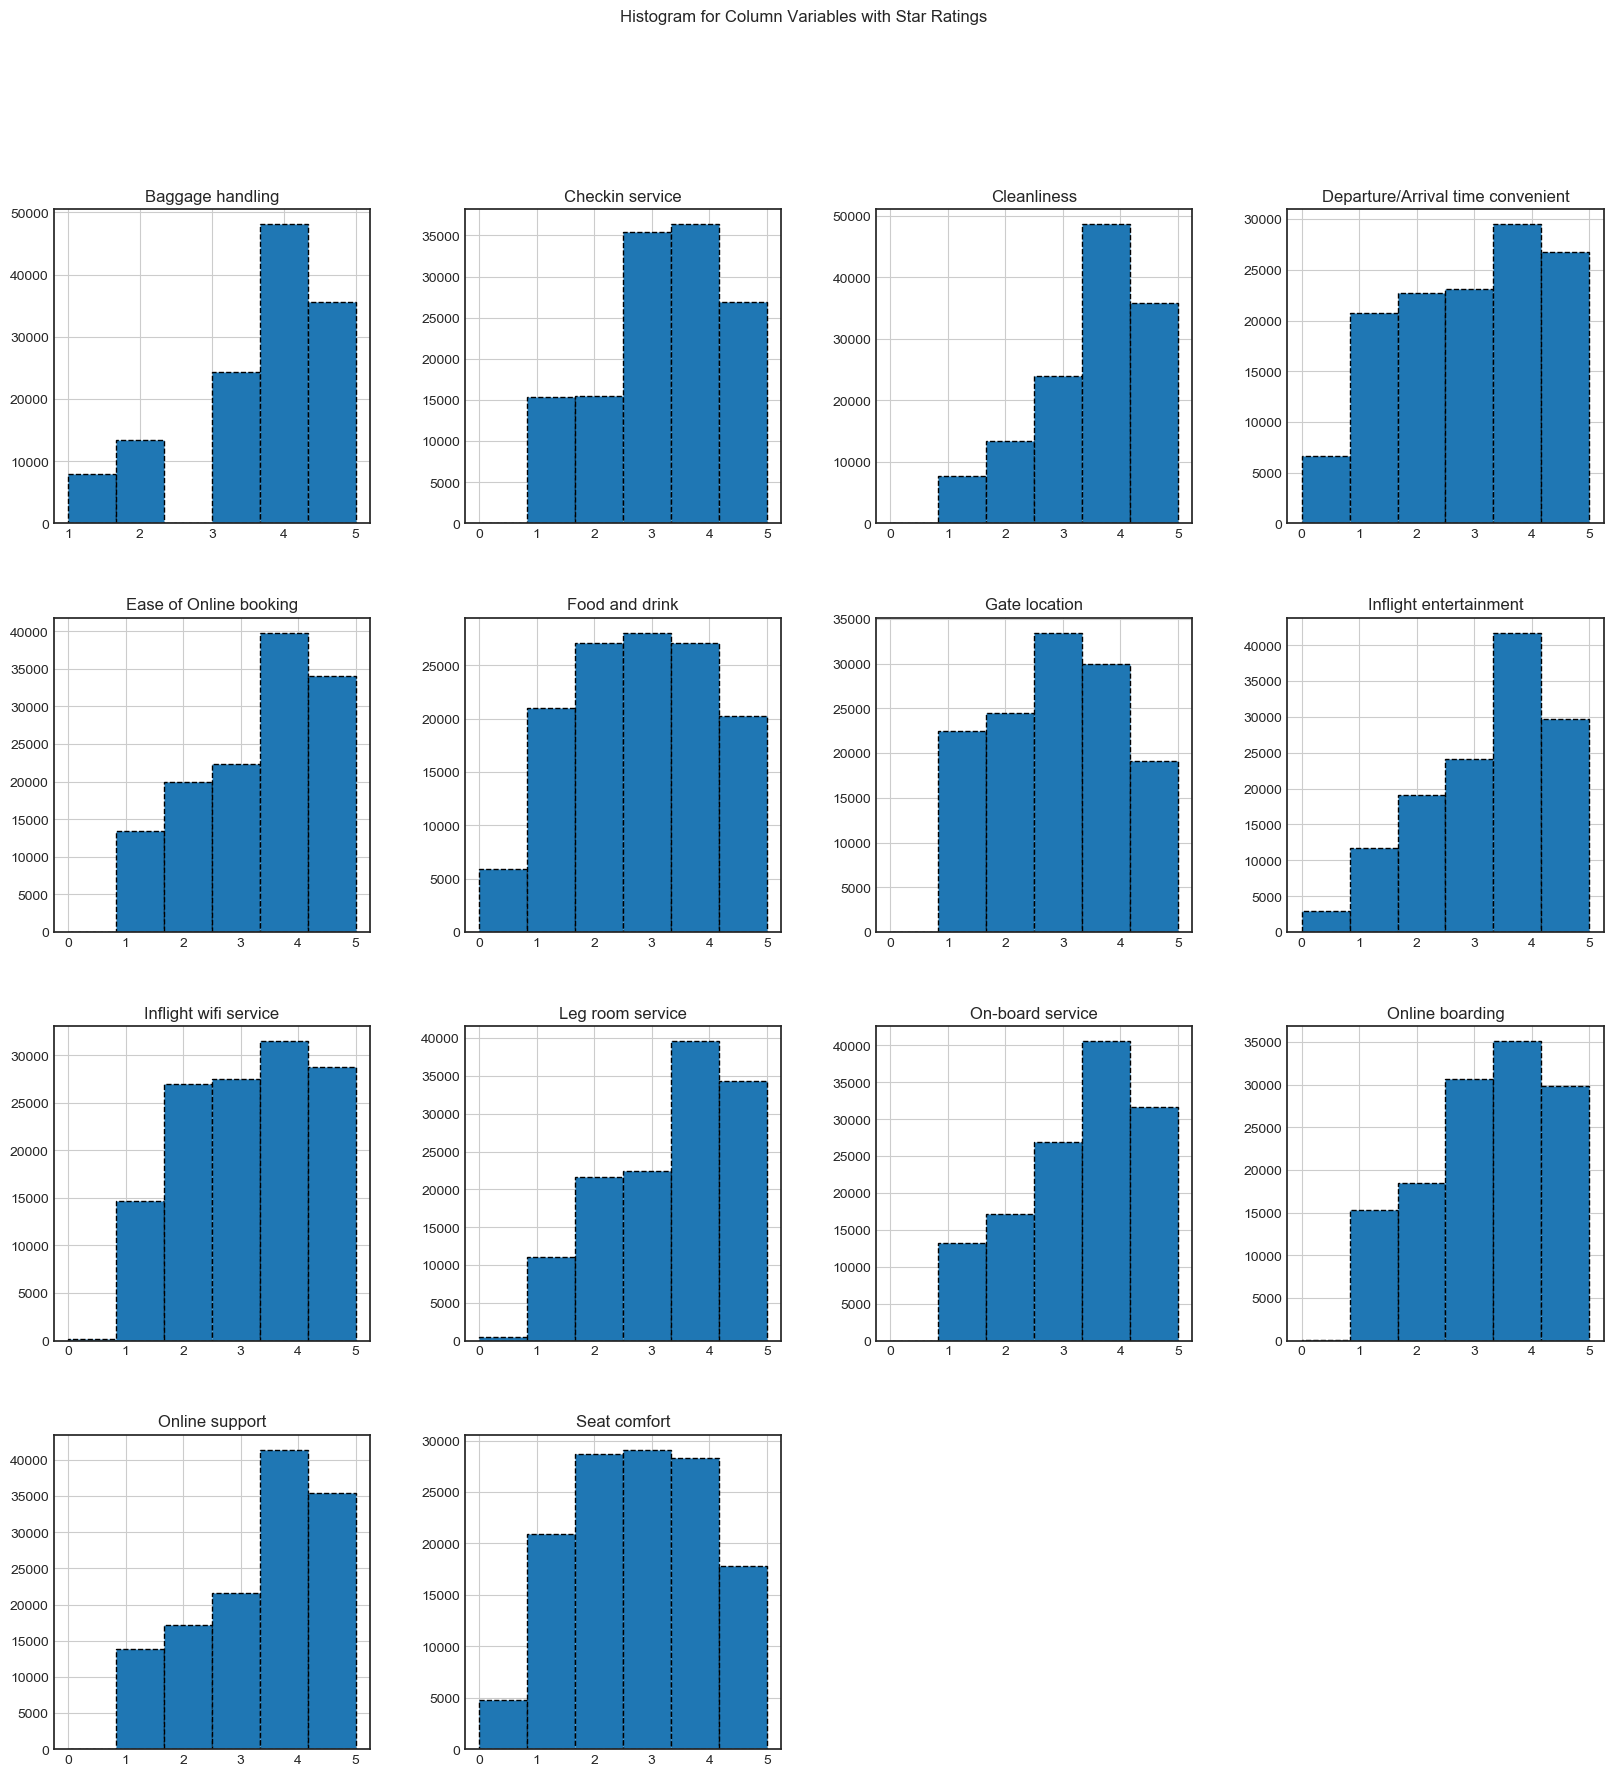

In [6]:
#defining a new data set to get specific attributes ranked from 0 to 5 stars
df_new = airplane_satisfaction.iloc[:,7:21]

#creating histogram to show the distribution of numerical variables and the 5 star ratings 
df_new.hist(bins=6, figsize=(20, 20), linestyle='dashed', histtype='bar', ec='black')
plt.suptitle("Histogram for Column Variables with Star Ratings")



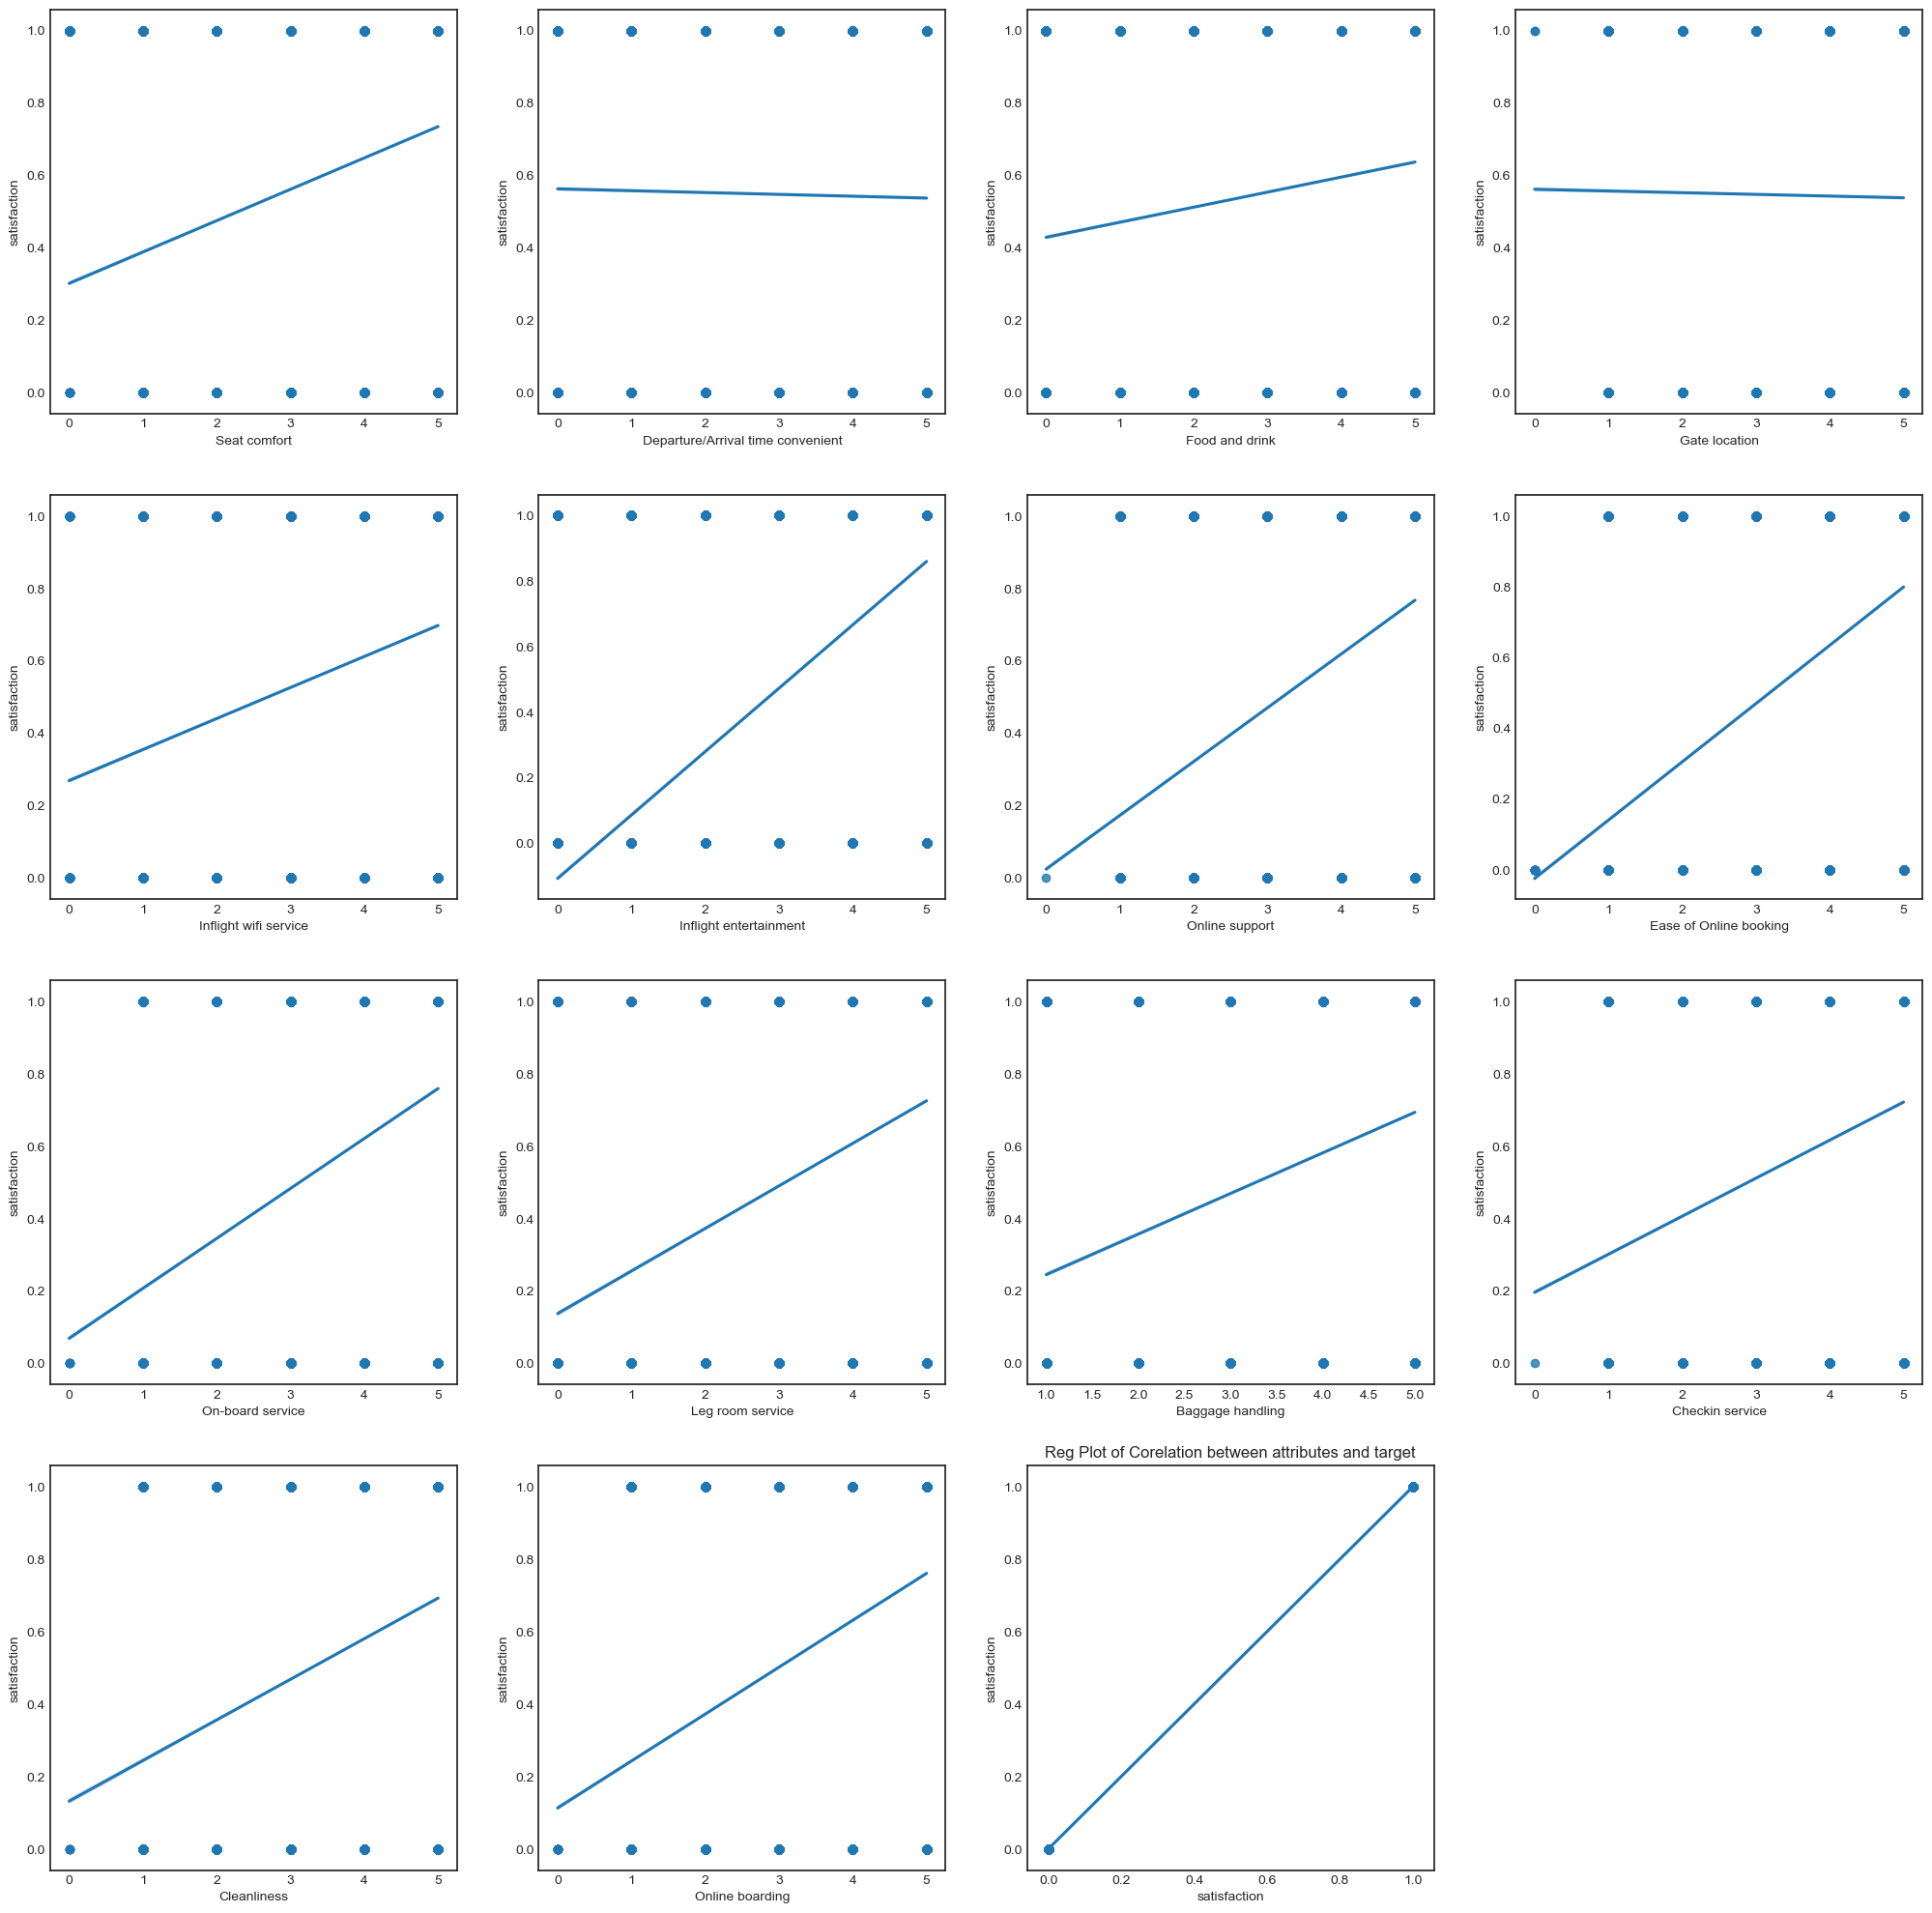

In [7]:
#making a regplot to see the corelation between the variables, the strength of one independent impact on target
#variable's variance as well as seeing direction of relationship between dependent and independent variables

extracted_col = airplane_satisfaction["satisfaction"]
df_new.insert(14, "satisfaction", extracted_col)


#converting satisfaction to numerical variable
df_new['satisfaction'].replace(['satisfied', 'dissatisfied'],
                        [1, 0], inplace=True)

#making a regplot
count=1
plt.subplots(figsize=(25,25))
for i in df_new.columns:
    plt.subplot(4,4,count)
    sns.regplot(x=df_new[i], y=df_new["satisfaction"]) 
    count+=1
plt.title("Reg Plot of Corelation between attributes and target")
plt.show()




In [8]:
#presenting numerically the correlation score between satisfaction and other input variables to see what variables have had a greater impact
#and to see their general relationsip with the target variables

df_new.drop("satisfaction", axis=1).apply(lambda x: x.corr(df_new["satisfaction"]))



Seat comfort                         0.242371
Departure/Arrival time convenient   -0.015624
Food and drink                       0.120568
Gate location                       -0.012272
Inflight wifi service                0.227010
Inflight entertainment               0.523364
Online support                       0.389890
Ease of Online booking               0.432017
On-board service                     0.352283
Leg room service                     0.305115
Baggage handling                     0.260398
Checkin service                      0.266089
Cleanliness                          0.259504
Online boarding                      0.338118
dtype: float64

## Converting categorical features to numeric

In [9]:
# Displaying all categorical columns
airplane_satisfaction[['satisfaction','Gender','Customer Type','Type of Travel','Class']]

,satisfaction,Gender,Customer Type,Type of Travel,Class
0,satisfied,Female,Loyal Customer,Personal Travel,Eco
1,satisfied,Male,Loyal Customer,Personal Travel,Business
2,satisfied,Female,Loyal Customer,Personal Travel,Eco
3,satisfied,Female,Loyal Customer,Personal Travel,Eco
4,satisfied,Female,Loyal Customer,Personal Travel,Eco
...,...,...,...,...,...
129875,satisfied,Female,disloyal Customer,Personal Travel,Eco
129876,dissatisfied,Male,disloyal Customer,Personal Travel,Business
129877,dissatisfied,Male,disloyal Customer,Personal Travel,Eco
129878,dissatisfied,Male,disloyal Customer,Personal Travel,Eco


In [10]:
#importing LabelEncoder
from sklearn.preprocessing import LabelEncoder

In [11]:
# Converting satisfaction column to numeric
le_satisfaction = LabelEncoder()
airplane_satisfaction['satisfaction'] = le_satisfaction.fit_transform(airplane_satisfaction['satisfaction'])

In [12]:
airplane_satisfaction['satisfaction']

0         1
1         1
2         1
3         1
4         1
         ..
129875    1
129876    0
129877    0
129878    0
129879    0
Name: satisfaction, Length: 129487, dtype: int64

In [13]:
# Converting gender column to numeric
le_gender = LabelEncoder()
airplane_satisfaction['Gender'] = le_gender.fit_transform(airplane_satisfaction['Gender'])

In [14]:
airplane_satisfaction['Gender']

0         0
1         1
2         0
3         0
4         0
         ..
129875    0
129876    1
129877    1
129878    1
129879    0
Name: Gender, Length: 129487, dtype: int64

In [15]:
# Converting customer type column to numeric
le_cust_type = LabelEncoder()
airplane_satisfaction['Customer Type'] = le_cust_type.fit_transform(airplane_satisfaction['Customer Type'])

In [16]:
airplane_satisfaction['Customer Type']

0         0
1         0
2         0
3         0
4         0
         ..
129875    1
129876    1
129877    1
129878    1
129879    1
Name: Customer Type, Length: 129487, dtype: int64

In [17]:
# Converting type of travel column to numeric
le_travel_type = LabelEncoder()
airplane_satisfaction['Type of Travel'] = le_travel_type.fit_transform(airplane_satisfaction['Type of Travel'])

In [18]:
airplane_satisfaction['Type of Travel']

0         1
1         1
2         1
3         1
4         1
         ..
129875    1
129876    1
129877    1
129878    1
129879    1
Name: Type of Travel, Length: 129487, dtype: int64

In [19]:
# Converting class column to numeric
le_class = LabelEncoder()
airplane_satisfaction['Class'] = le_class.fit_transform(airplane_satisfaction['Class'])

In [20]:
airplane_satisfaction['Class']

0         1
1         0
2         1
3         1
4         1
         ..
129875    1
129876    0
129877    1
129878    1
129879    1
Name: Class, Length: 129487, dtype: int64

## Splitting Data into train and test splits

In [21]:
# Splitting into features and output column and into training and testing sets.
X = airplane_satisfaction.loc[:,airplane_satisfaction.columns!='satisfaction']
y = airplane_satisfaction['satisfaction']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [22]:
# Importing the sequentialfeatureselector
from sklearn.feature_selection import SequentialFeatureSelector

Selecting the best features for the classification

In [23]:
from sklearn.naive_bayes import GaussianNB
# Defining SequentialFeatureSelector with given parameters and fitting on data to get selected columns.
gnb_for_sfs = GaussianNB()
sfs = SequentialFeatureSelector(gnb_for_sfs,n_features_to_select = 7,direction = 'forward',scoring = 'accuracy',
                               cv = 10)
sfs.fit(X,y)
print(X.columns[sfs.get_support()])

Index(['Flight Distance', 'Seat comfort', 'Departure/Arrival time convenient',
       'Gate location', 'Inflight wifi service', 'Inflight entertainment',
       'On-board service'],
      dtype='object')


In [24]:
# Classifying the classes with the selected features and evaluating using the classification report.
nb_model = GaussianNB()
nb_model.fit(X_train[['Flight Distance', 'Seat comfort', 'Departure/Arrival time convenient',
       'Gate location', 'Inflight wifi service', 'Inflight entertainment',
       'On-board service']], y_train)
y_pred = nb_model.predict(X_test[['Flight Distance', 'Seat comfort', 'Departure/Arrival time convenient',
       'Gate location', 'Inflight wifi service', 'Inflight entertainment',
       'On-board service']])

print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.78      0.83      0.80     11146
           1       0.86      0.82      0.84     14752

    accuracy                           0.82     25898
   macro avg       0.82      0.82      0.82     25898
weighted avg       0.83      0.82      0.83     25898



# Reading and Cleaning dataset - Second Dataset

In [25]:
#Load the dataset to get the information for airport customer satisfaction
#create a dataframe called airport_satisfaction with the Airport_Quarterly_Passenger_Survey.csv information
airport_satisfaction = pd.read_csv("Airport_Quarterly_Passenger_Survey.csv")
airport_satisfaction.head(5)

,Quarter,Date recorded,Departure time,Ground transportation to/from airport,Parking facilities,Parking facilities (value for money),Availability of baggage carts,Efficiency of check-in staff,Check-in wait time,Courtesy of of check-in staff,...,Business/executive lounges,Availability of washrooms,Cleanliness of washrooms,Comfort of waiting/gate areas,Cleanliness of airport terminal,Ambience of airport,Arrivals passport and visa inspection,Speed of baggage delivery,Customs inspection,Overall satisfaction
0,4Q16,11/12/2016,8:46 PM,4.0,0.0,0.0,0.0,5.0,5.0,5.0,...,0.0,5.0,4.0,5.0,5.0,4.0,0.0,4.0,0.0,4.0
1,4Q16,10/05/2016,6:57 PM,5.0,0.0,0.0,0.0,5.0,4.0,5.0,...,0.0,5.0,5.0,4.0,5.0,4.0,0.0,5.0,0.0,4.0
2,4Q16,10/18/2016,10:55 AM,4.0,4.0,4.0,4.0,4.0,4.0,4.0,...,3.0,4.0,4.0,4.0,4.0,4.0,0.0,3.0,0.0,4.0
3,4Q16,10/20/2016,8:45 AM,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,5.0,4.0,NaN,5.0,4.0,0.0,0.0,0.0,5.0
4,4Q16,12/04/2016,10:30 AM,0.0,0.0,0.0,0.0,5.0,0.0,0.0,...,1.0,4.0,5.0,3.0,5.0,5.0,0.0,0.0,0.0,5.0


In [26]:
#Explore if the dataset has NAs
print("Original data set \n")
print(airport_satisfaction.isnull().sum(axis=0))
#Drop the rows with missing values
airport_satisfaction = airport_satisfaction.dropna(subset=['Overall satisfaction'])


Original data set 

Quarter                                           0
Date recorded                                     0
Departure time                                    0
Ground transportation to/from airport            54
Parking facilities                               39
Parking facilities (value for money)             46
Availability of baggage carts                    91
Efficiency of check-in staff                     38
Check-in wait time                               39
Courtesy of of check-in staff                    52
Wait time at passport inspection                 69
Courtesy of inspection staff                     96
Courtesy of security staff                       31
Thoroughness of security inspection              46
Wait time of security inspection                 50
Feeling of safety and security                   43
Ease of finding your way through the airport     36
Flight information screens                       26
Walking distance inside terminal            

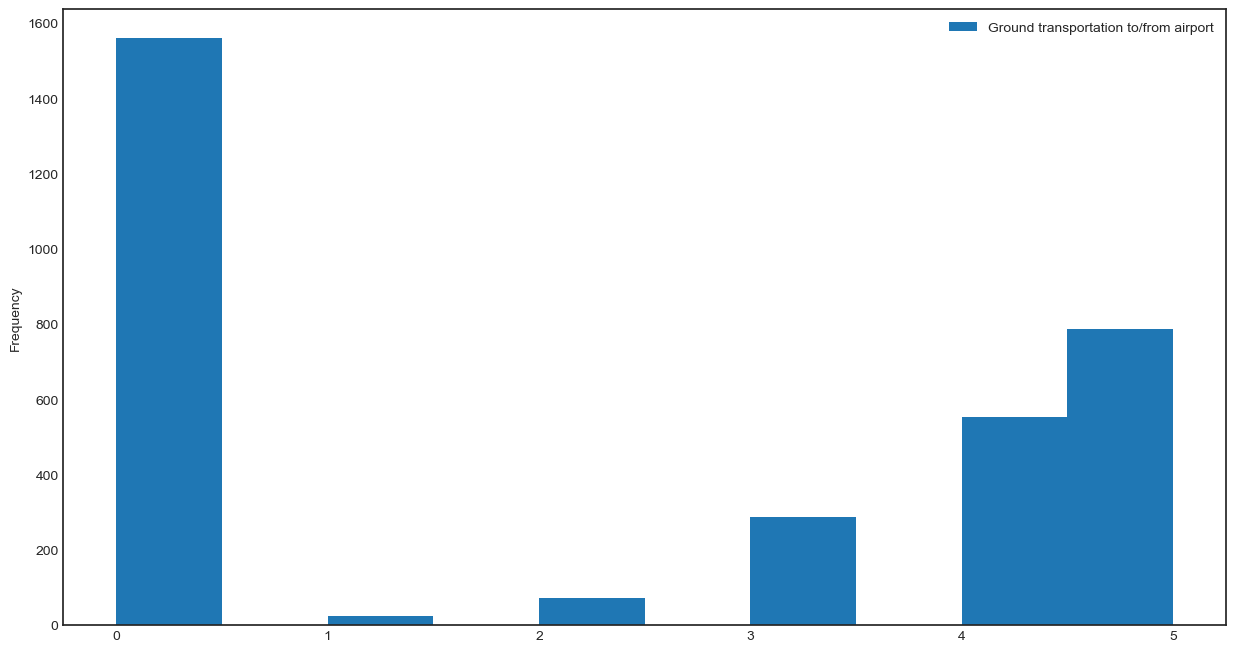

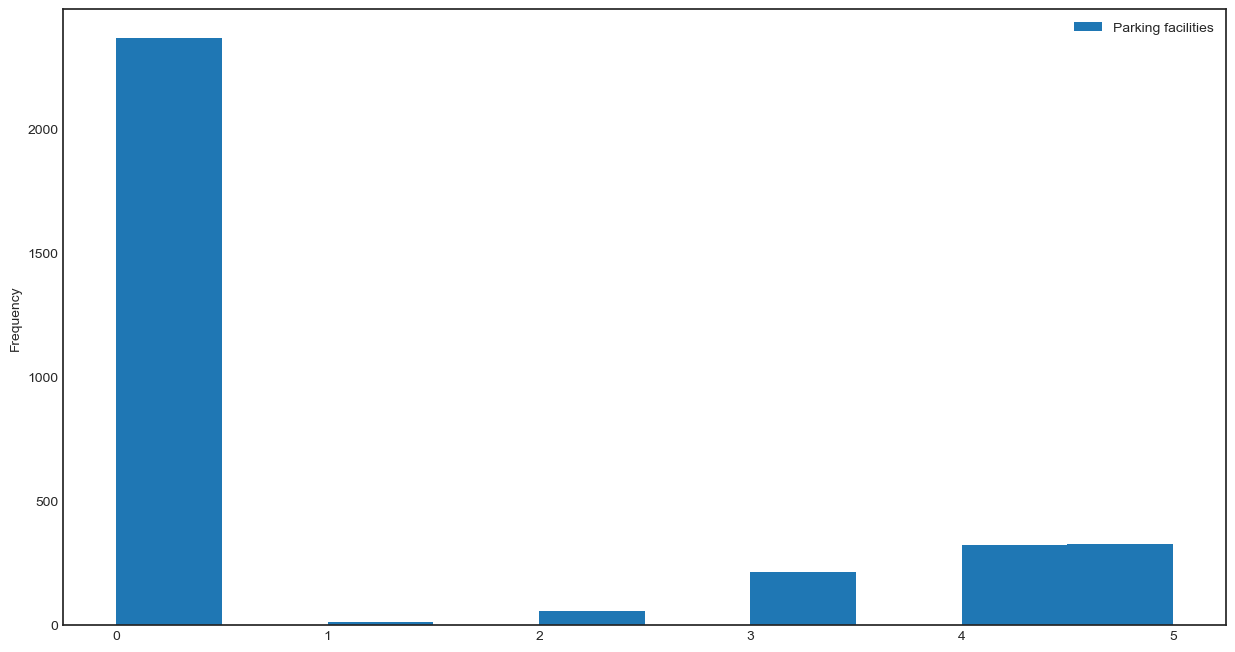

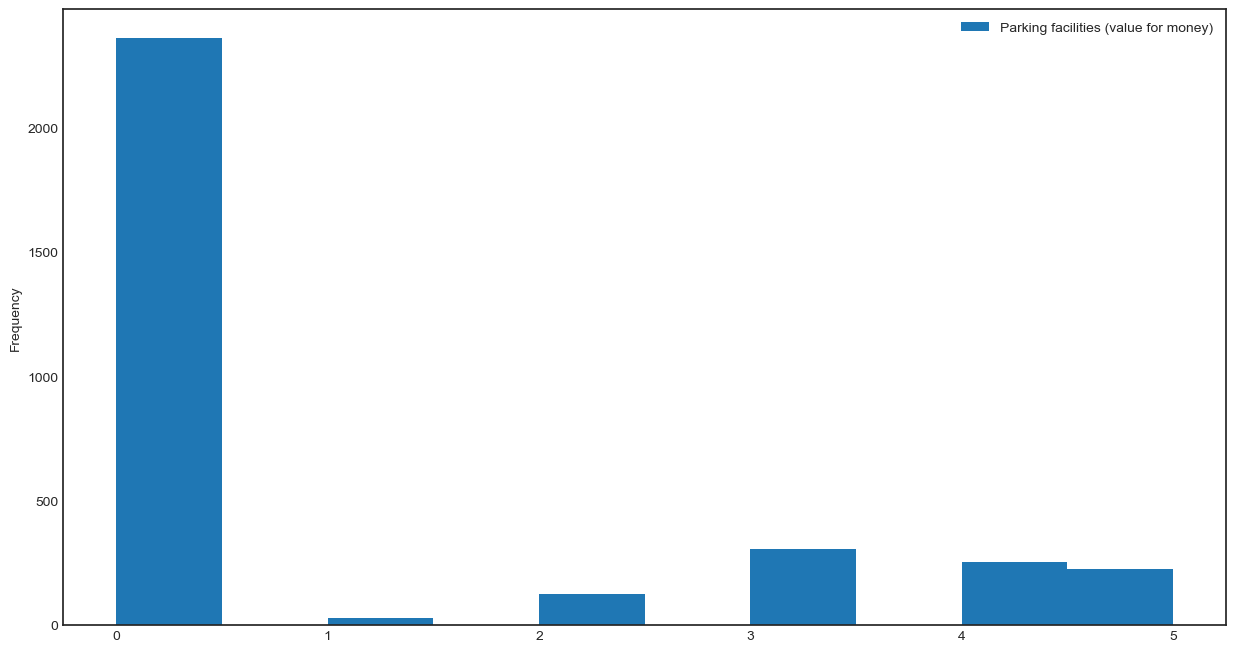

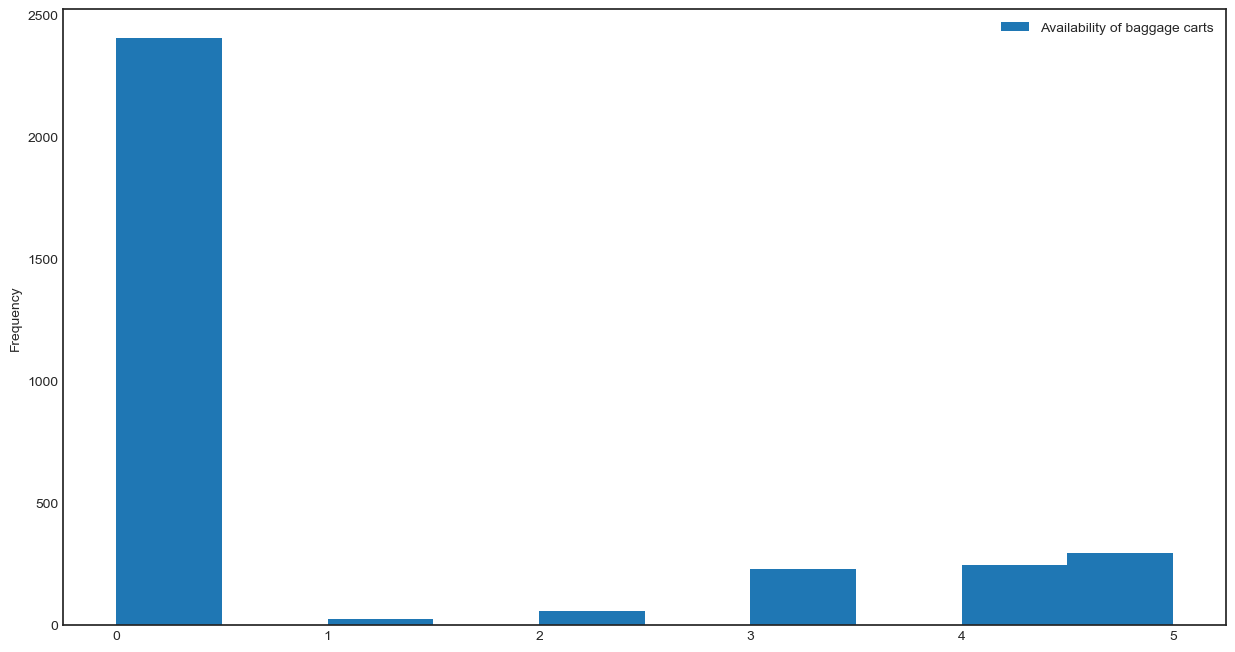

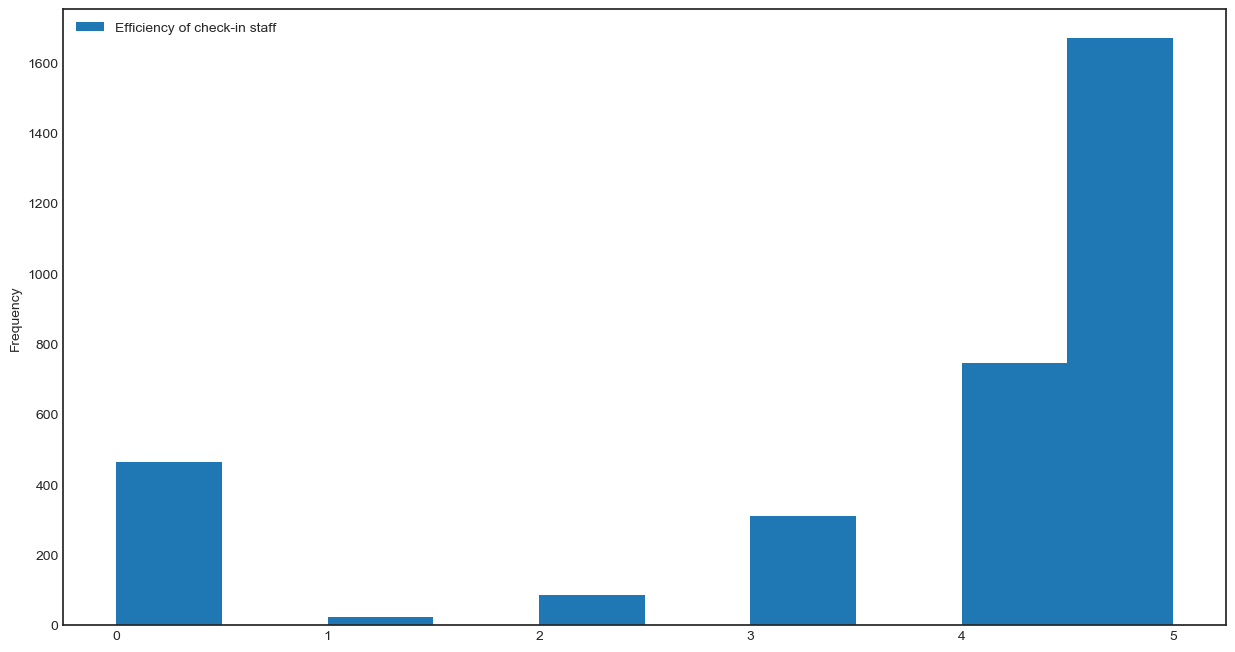

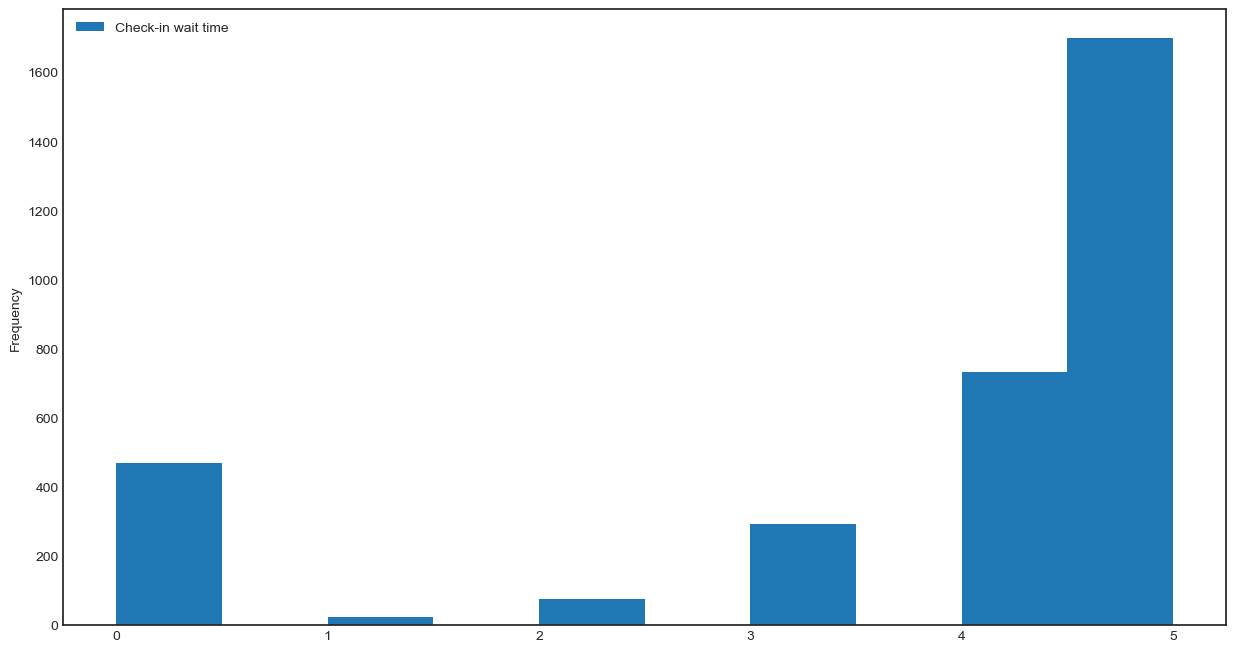

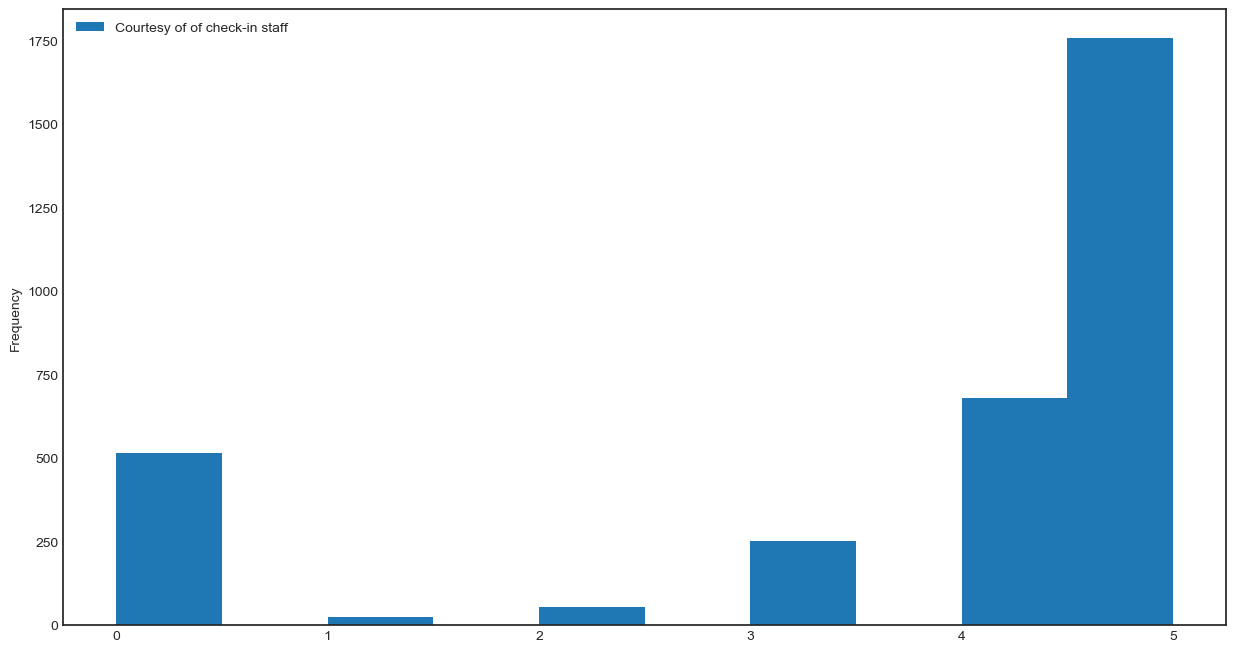

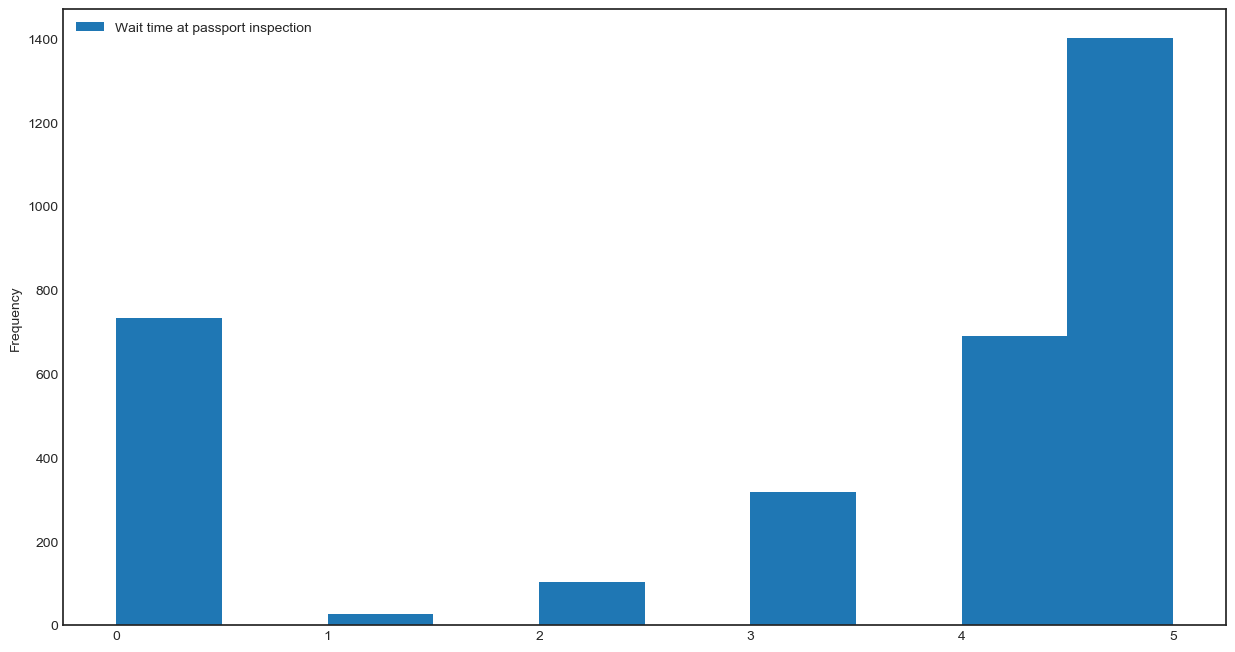

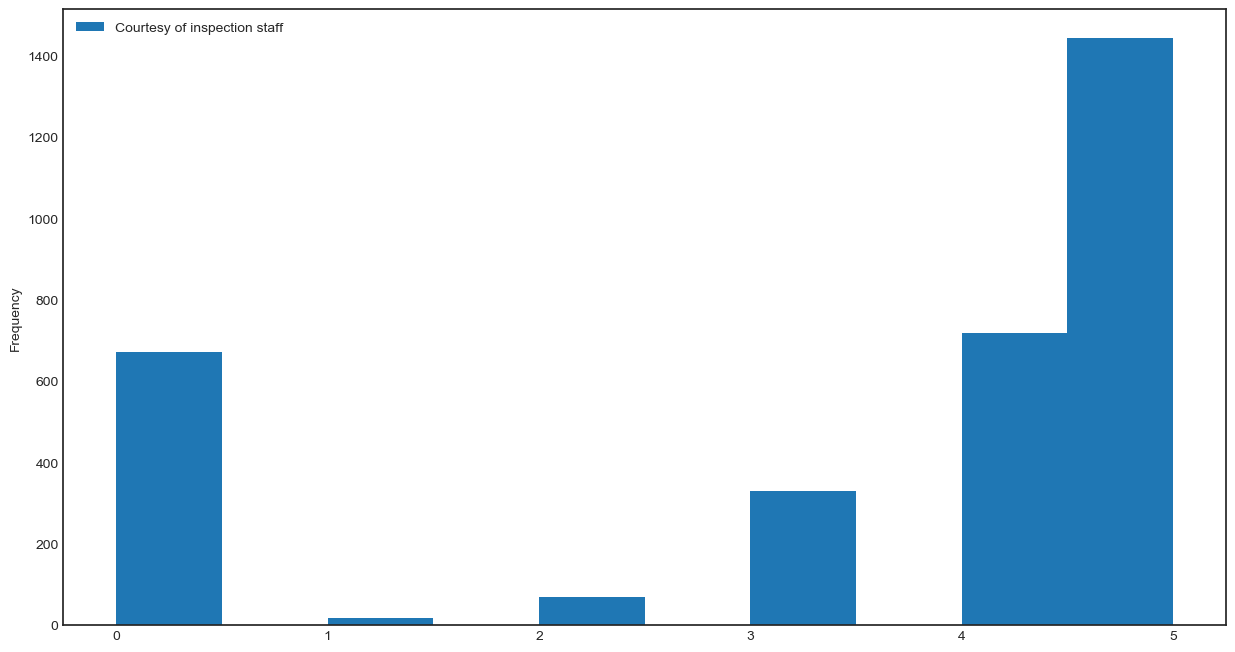

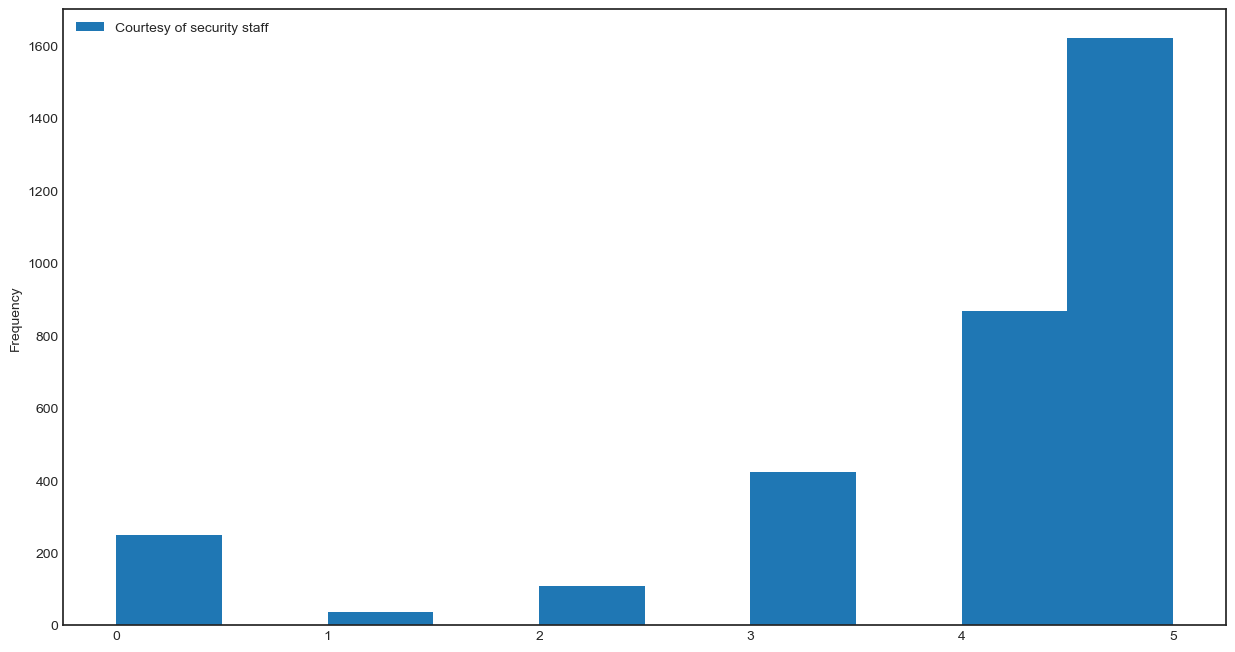

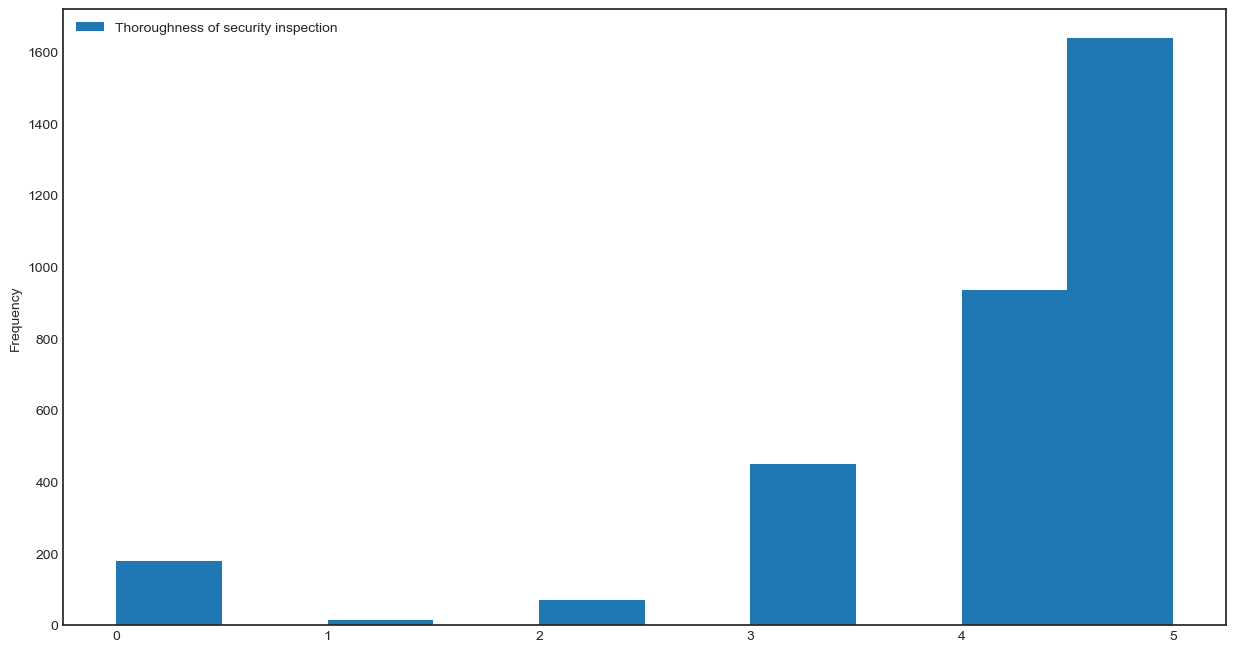

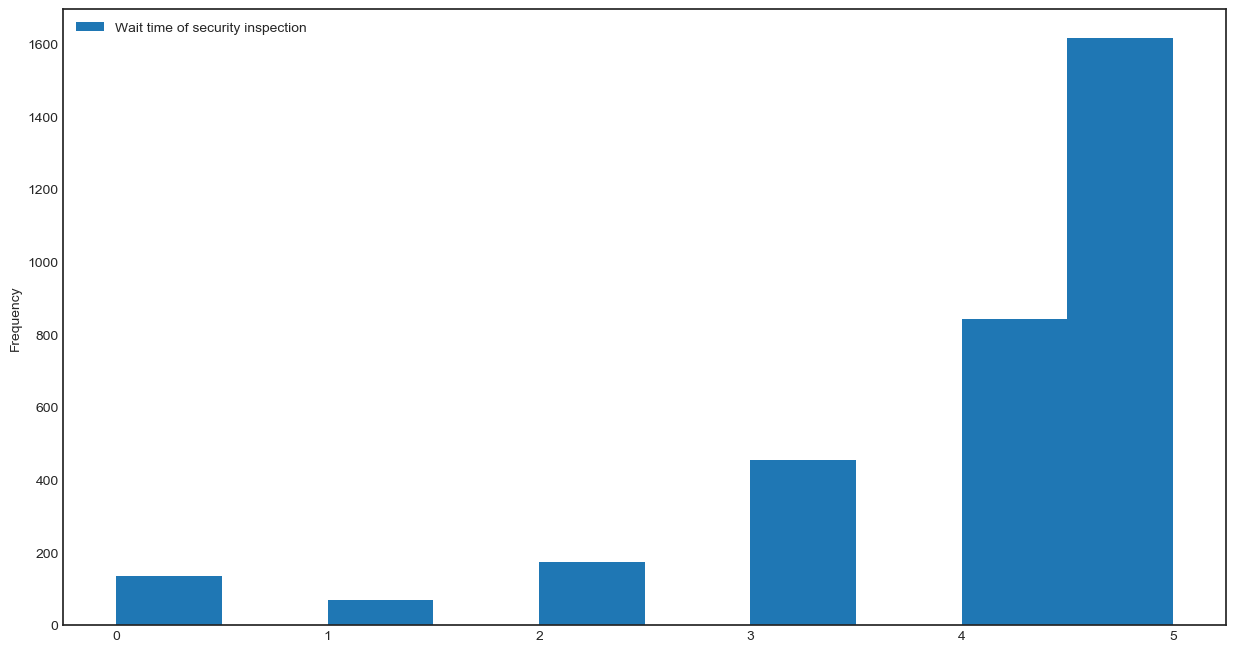

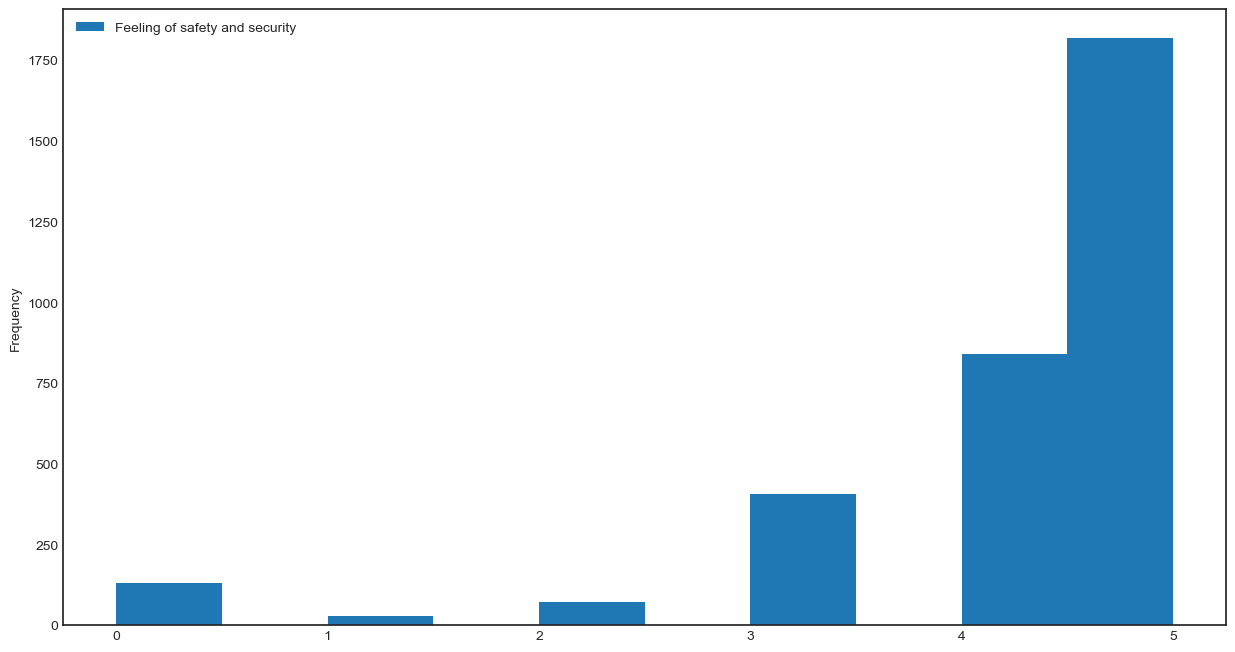

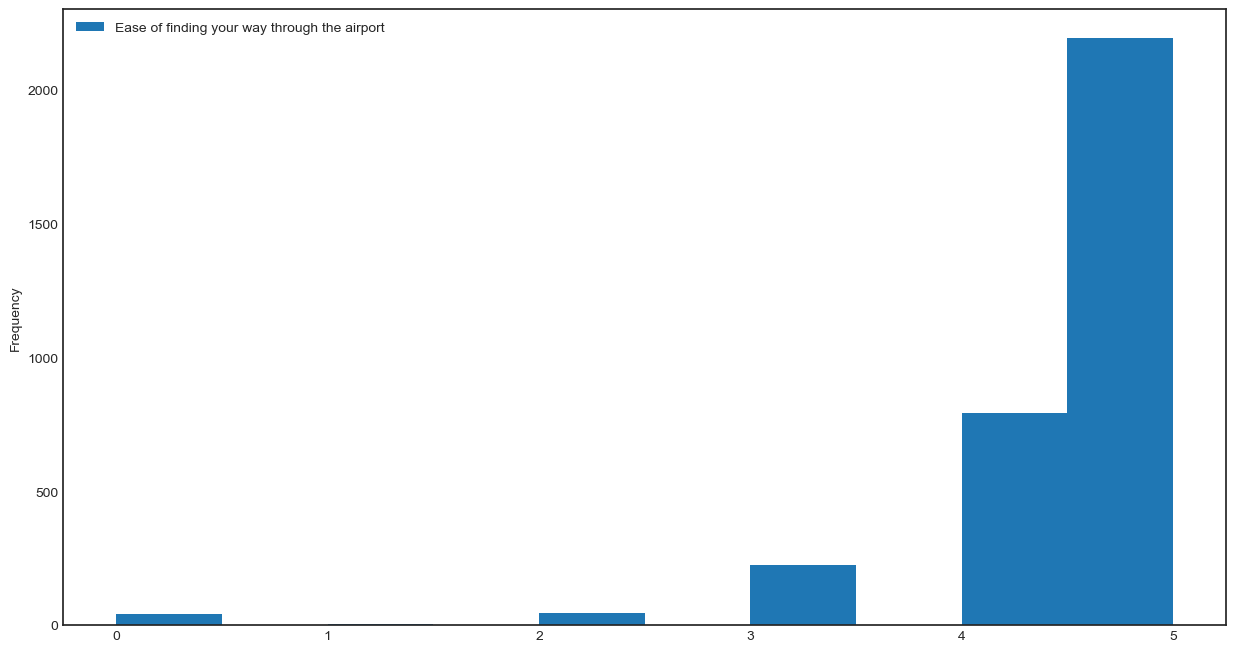

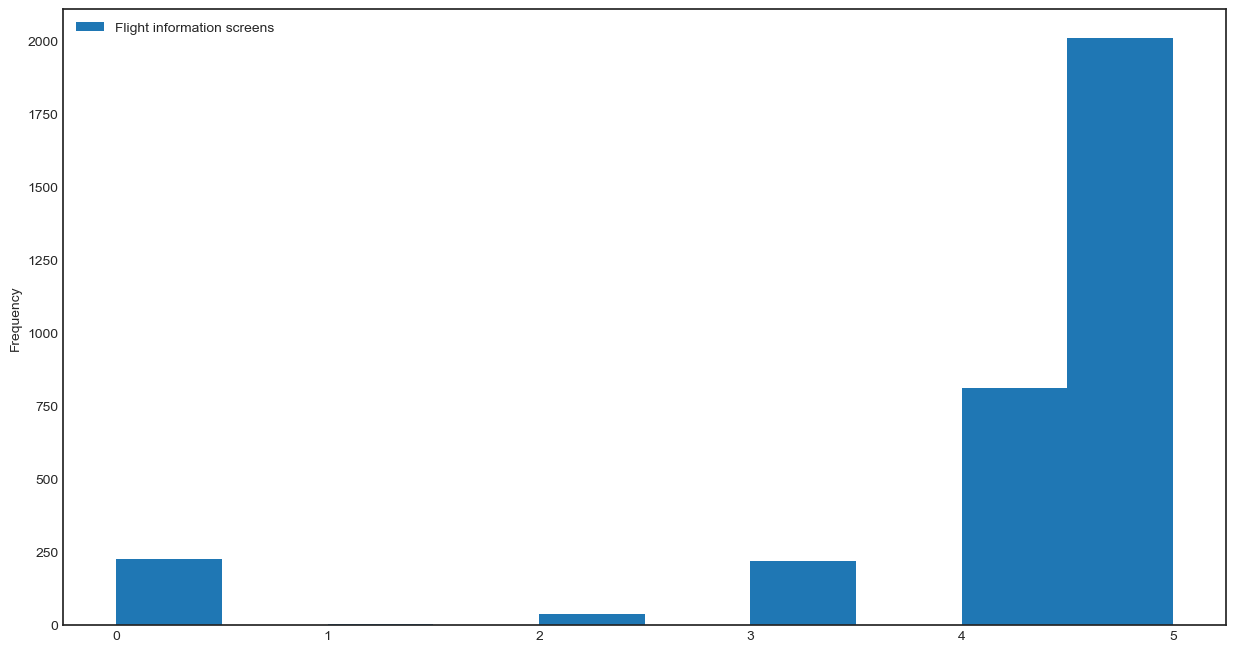

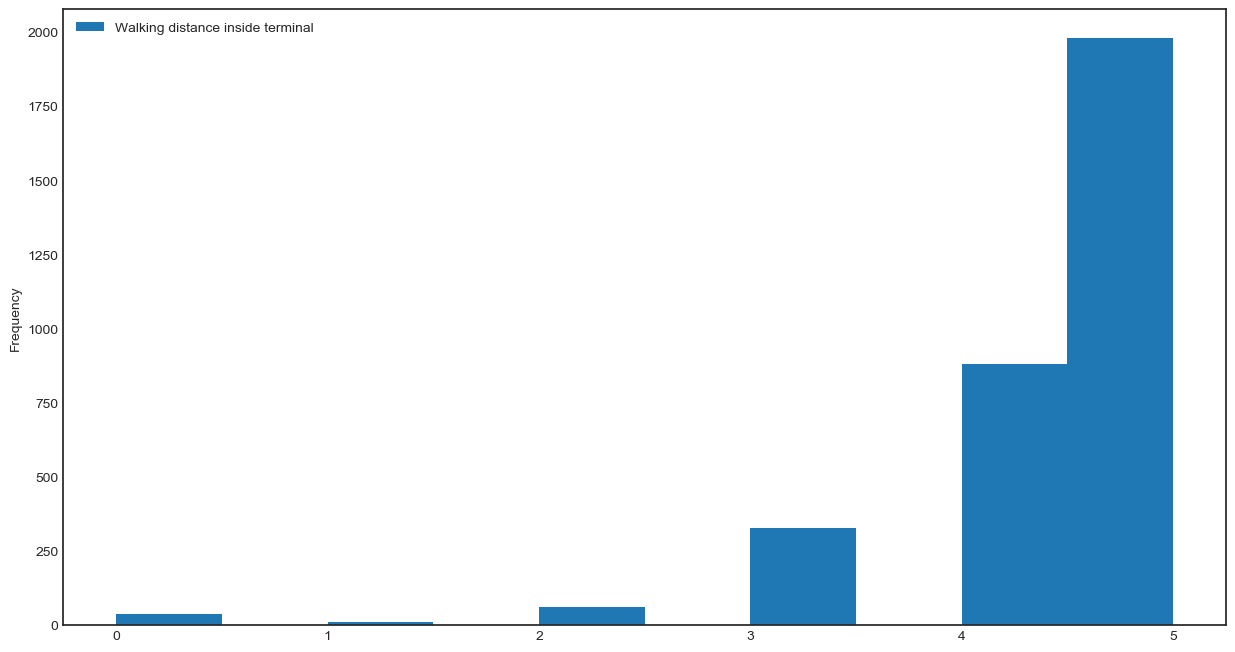

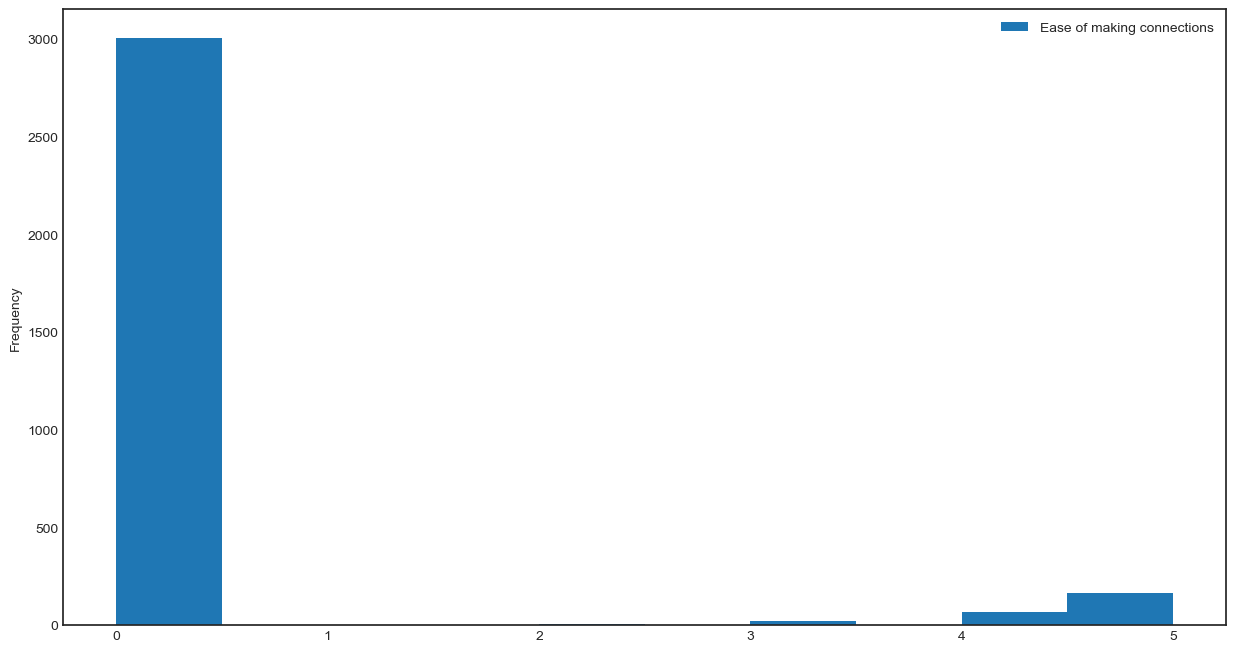

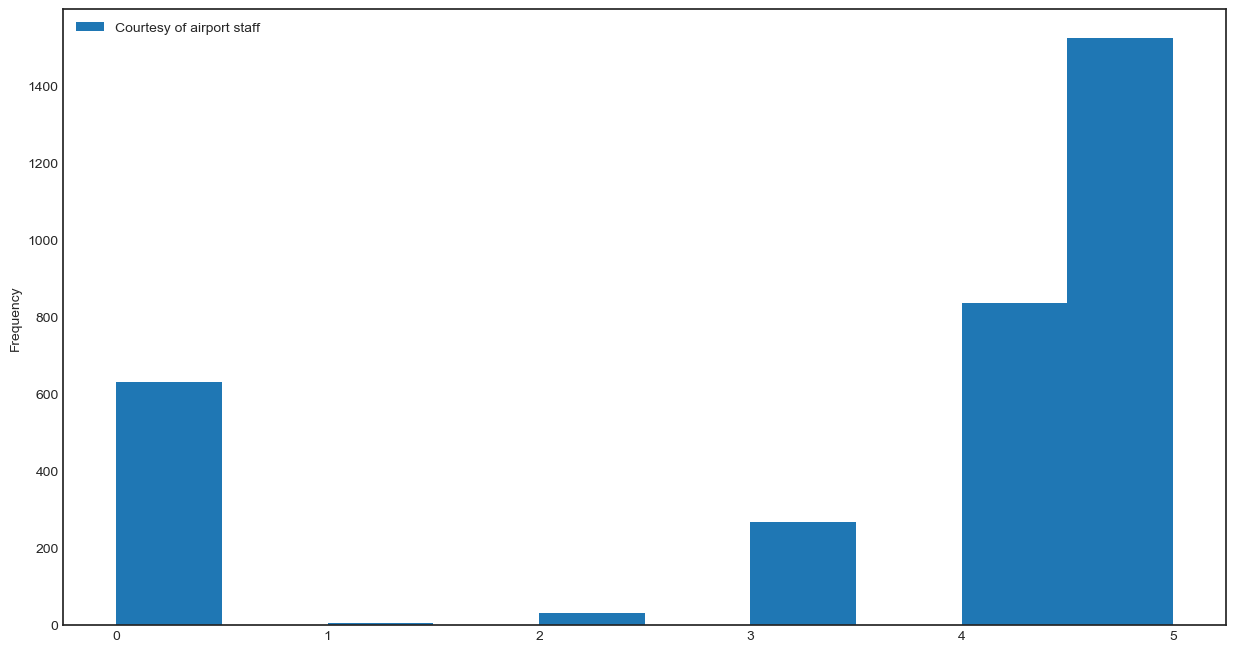

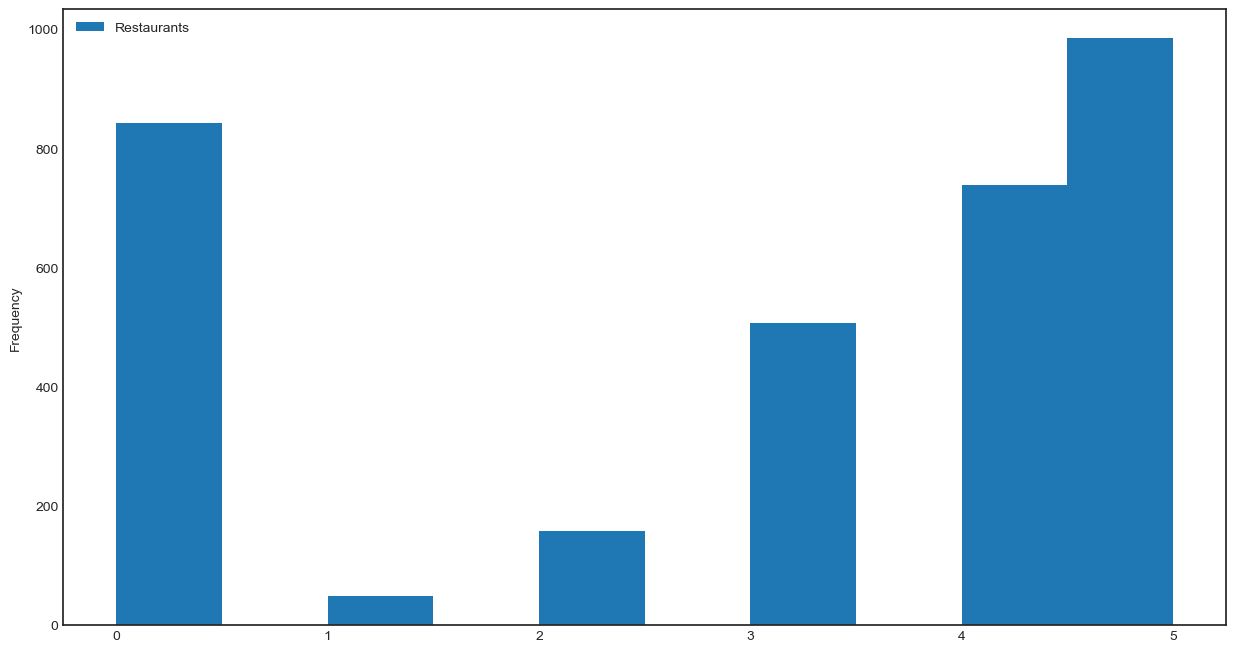

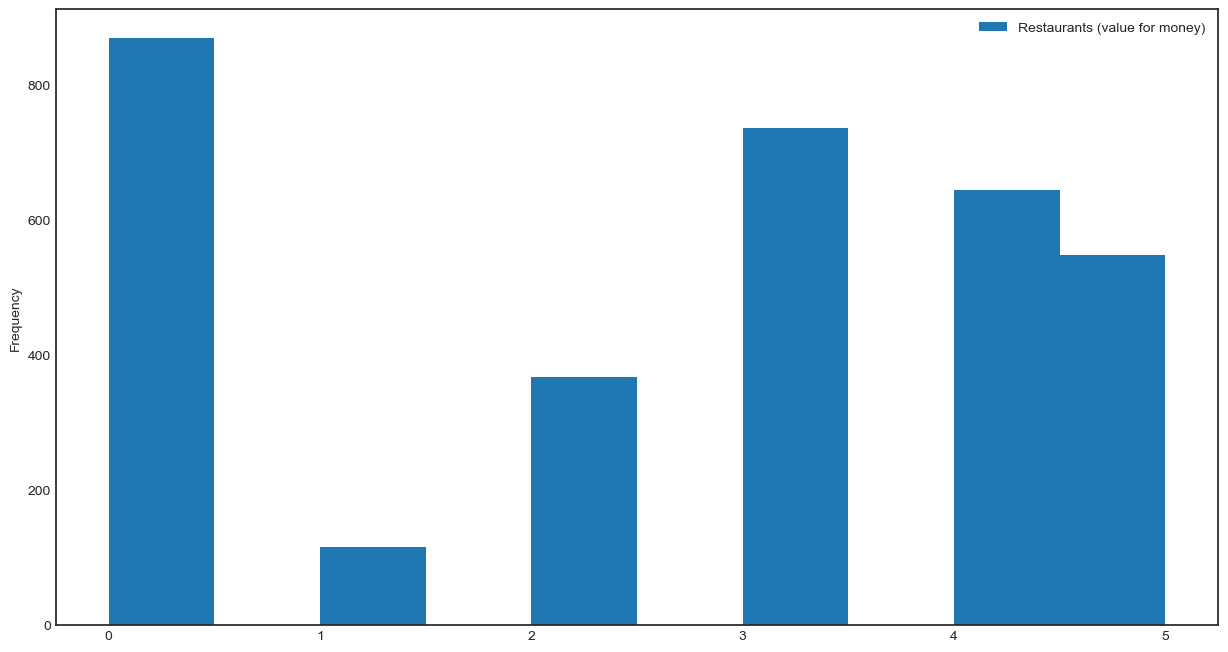

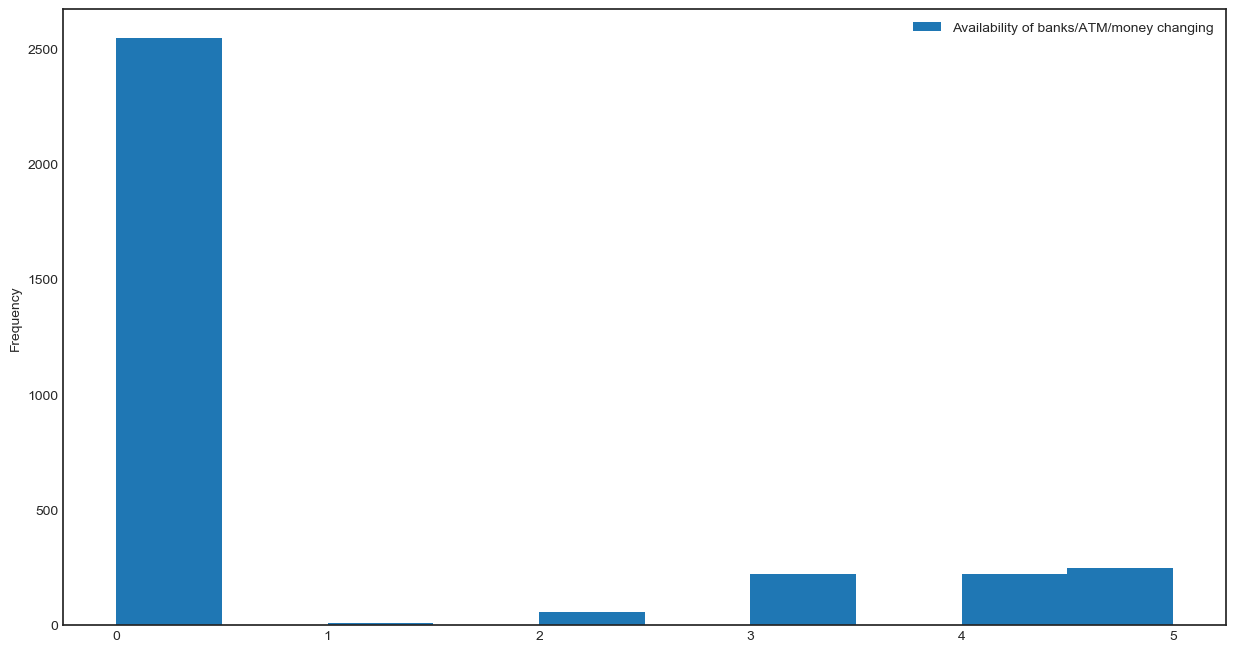

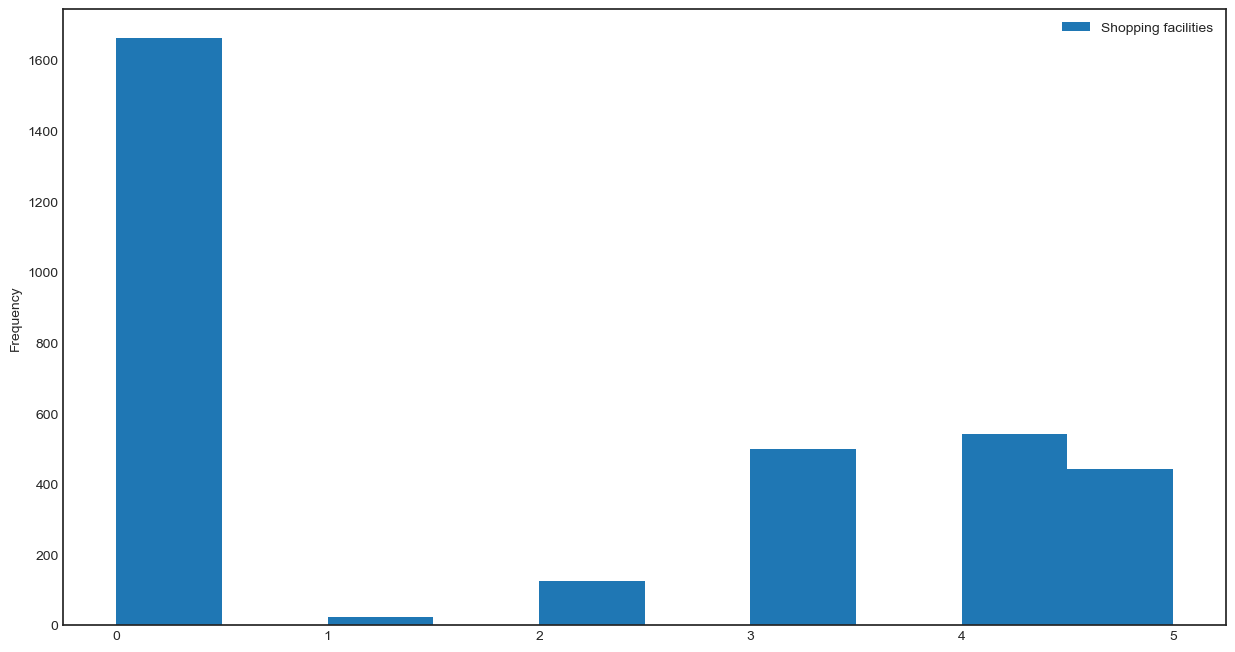

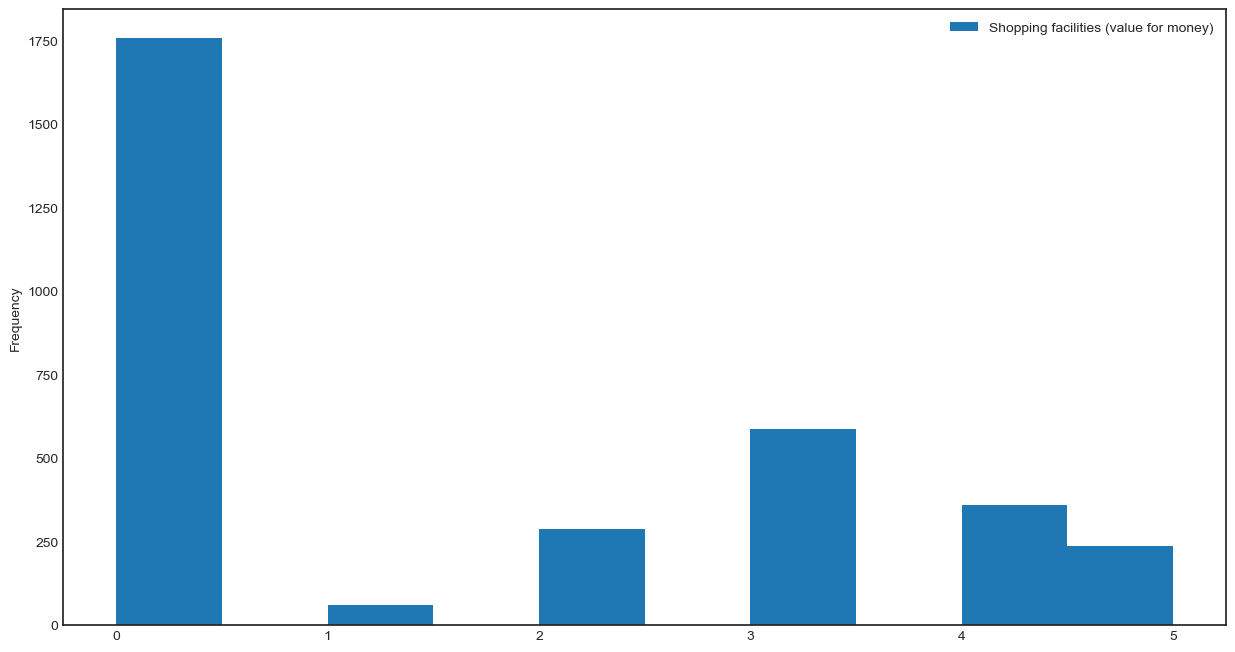

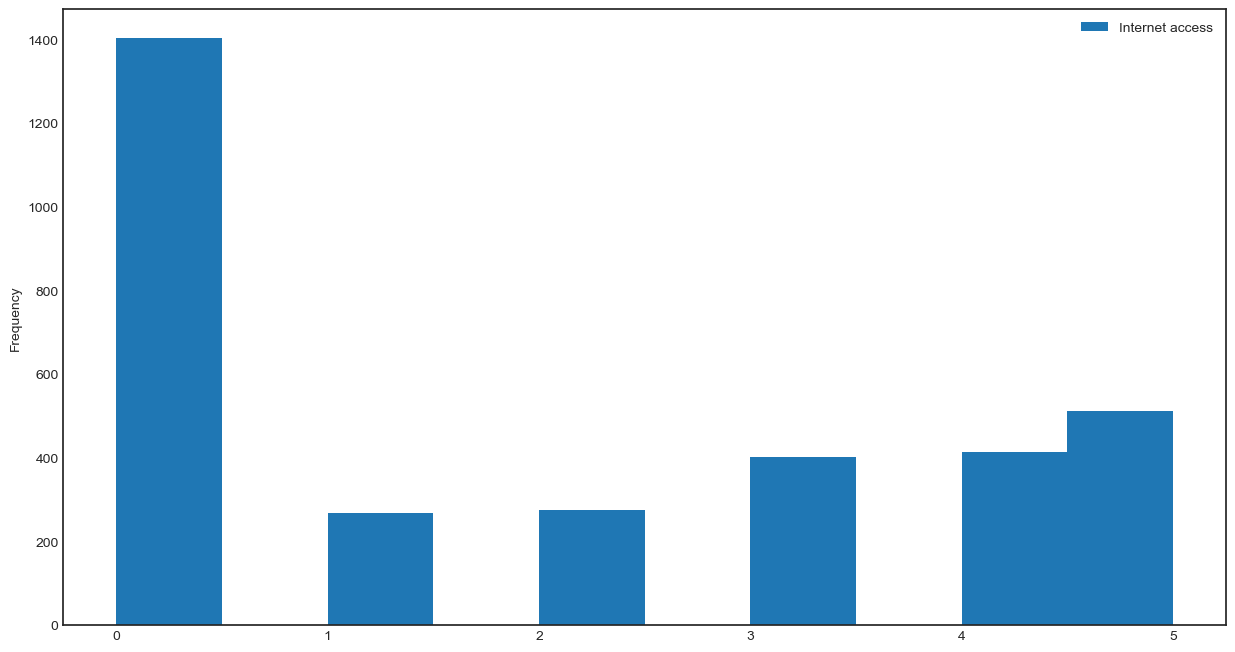

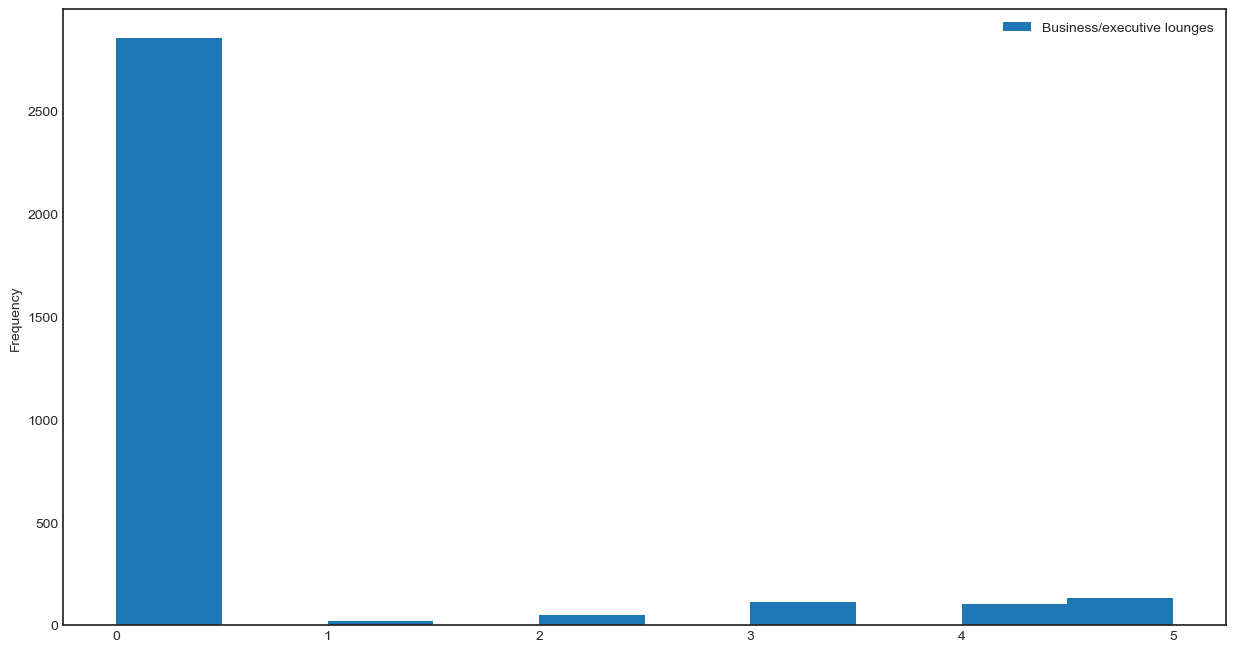

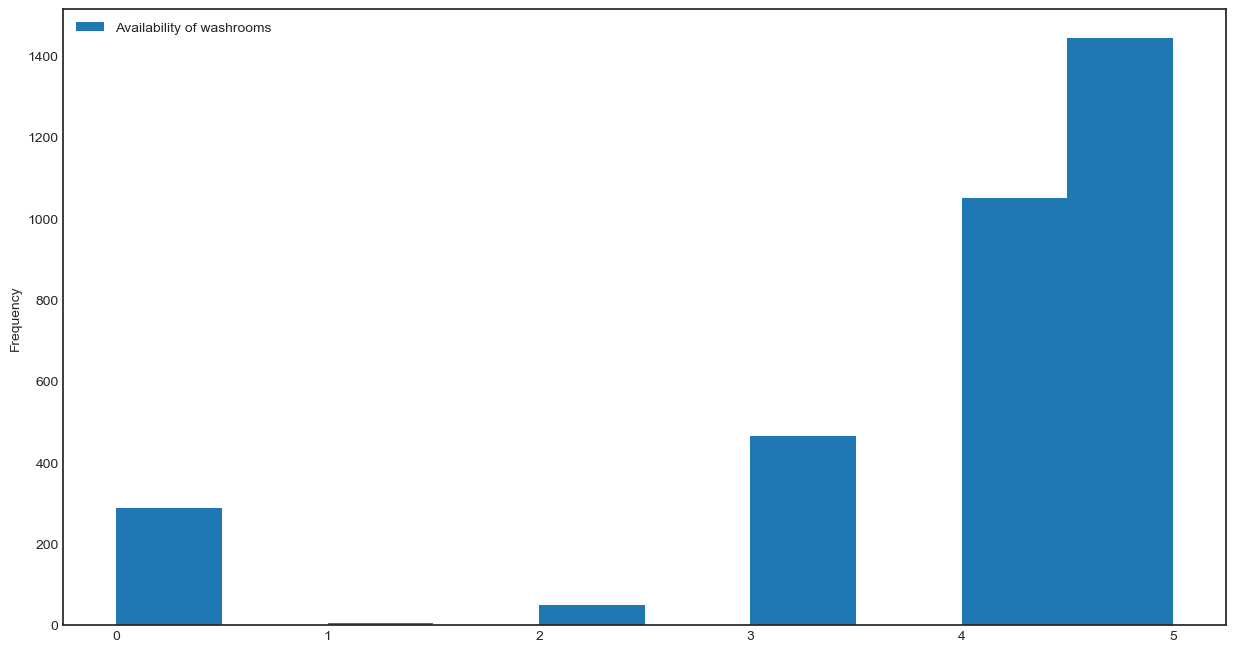

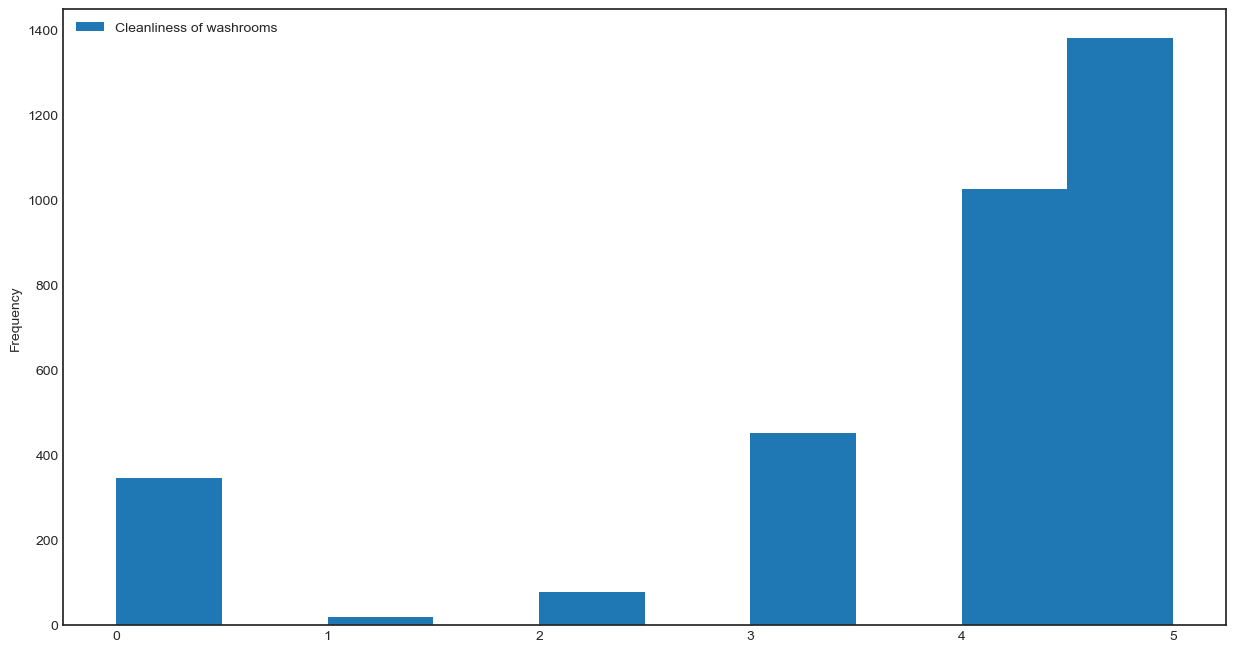

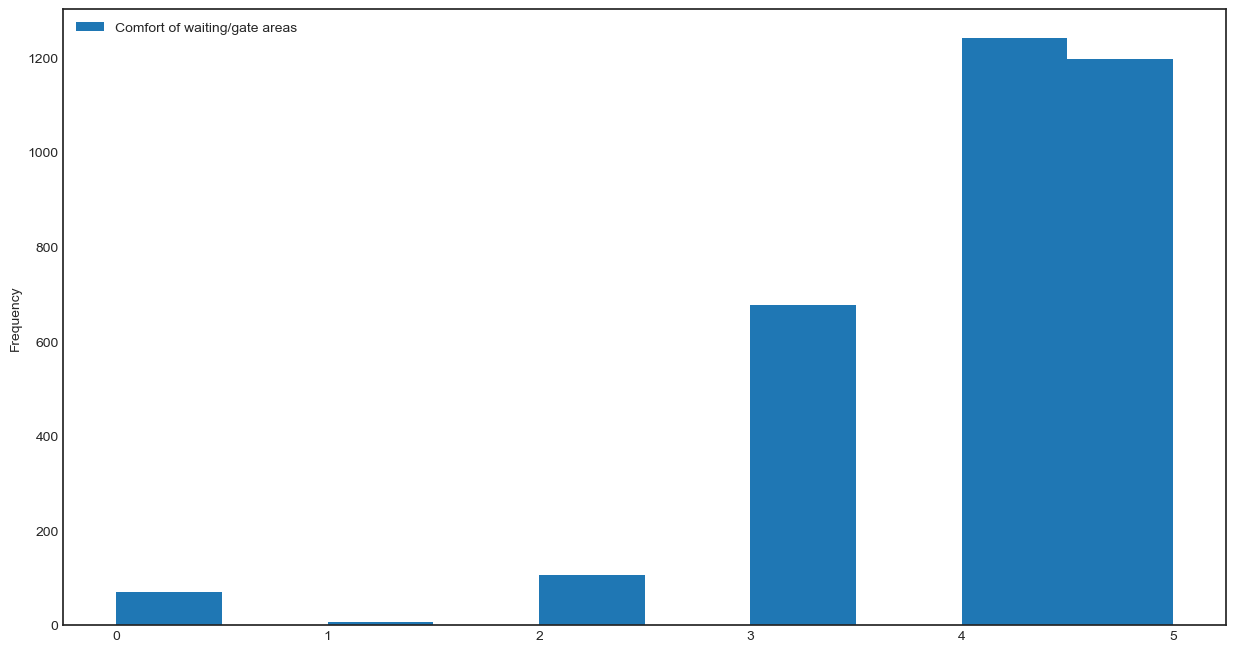

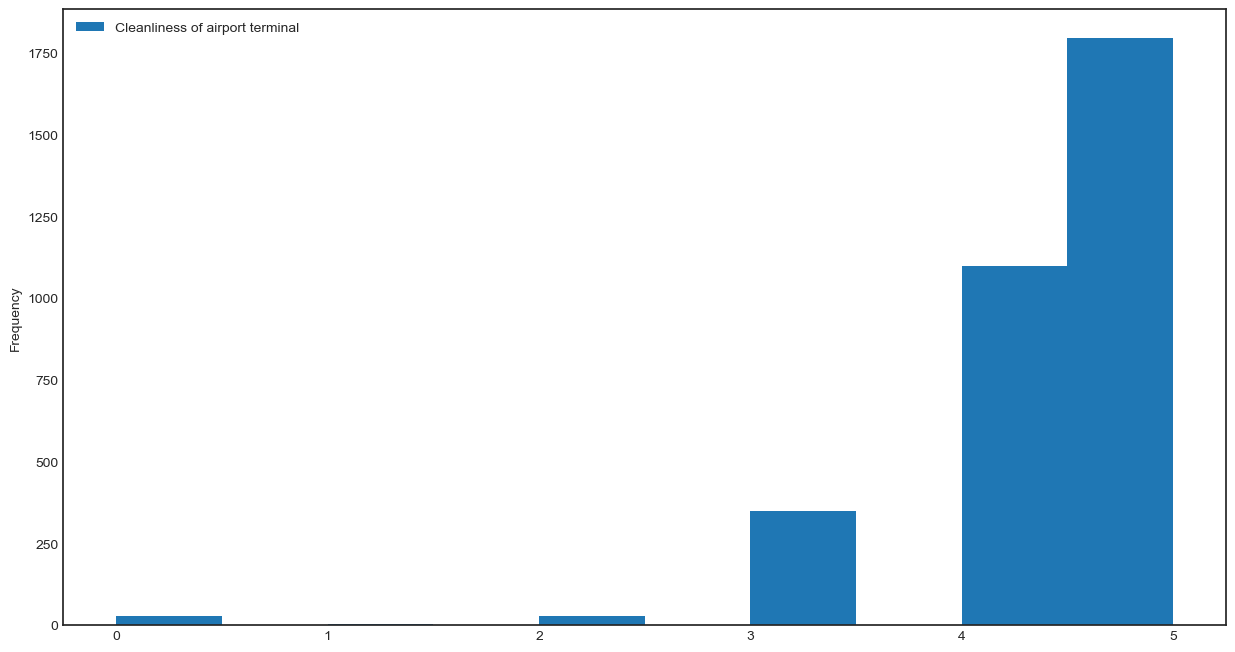

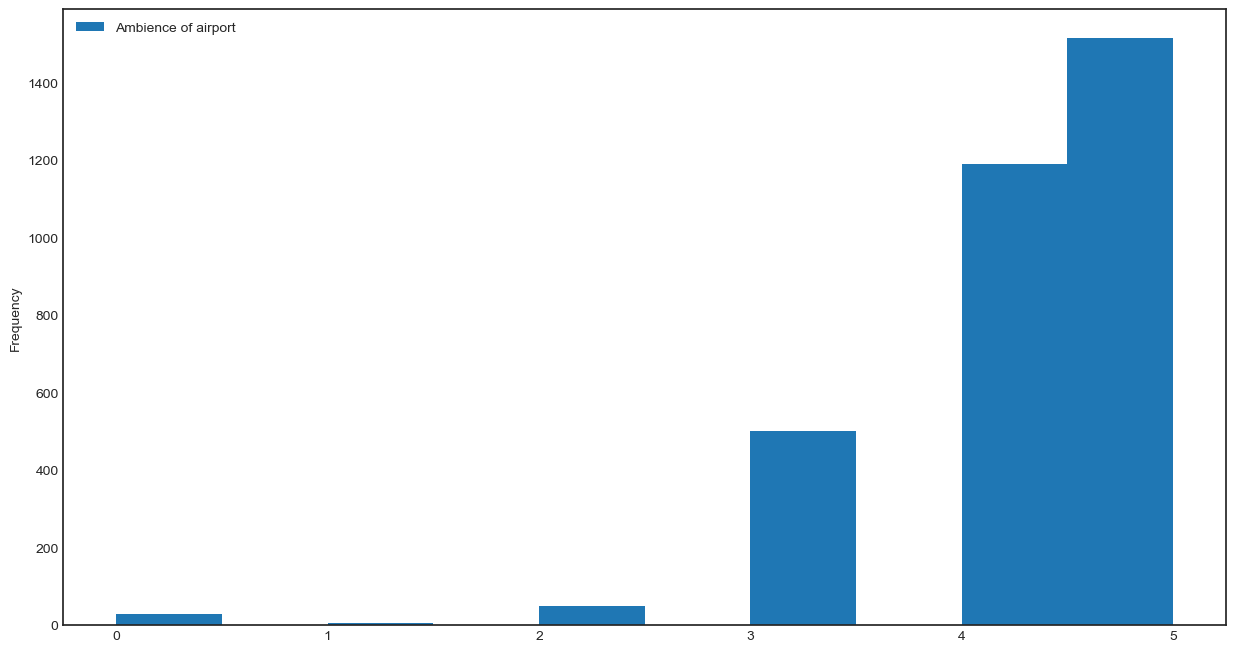

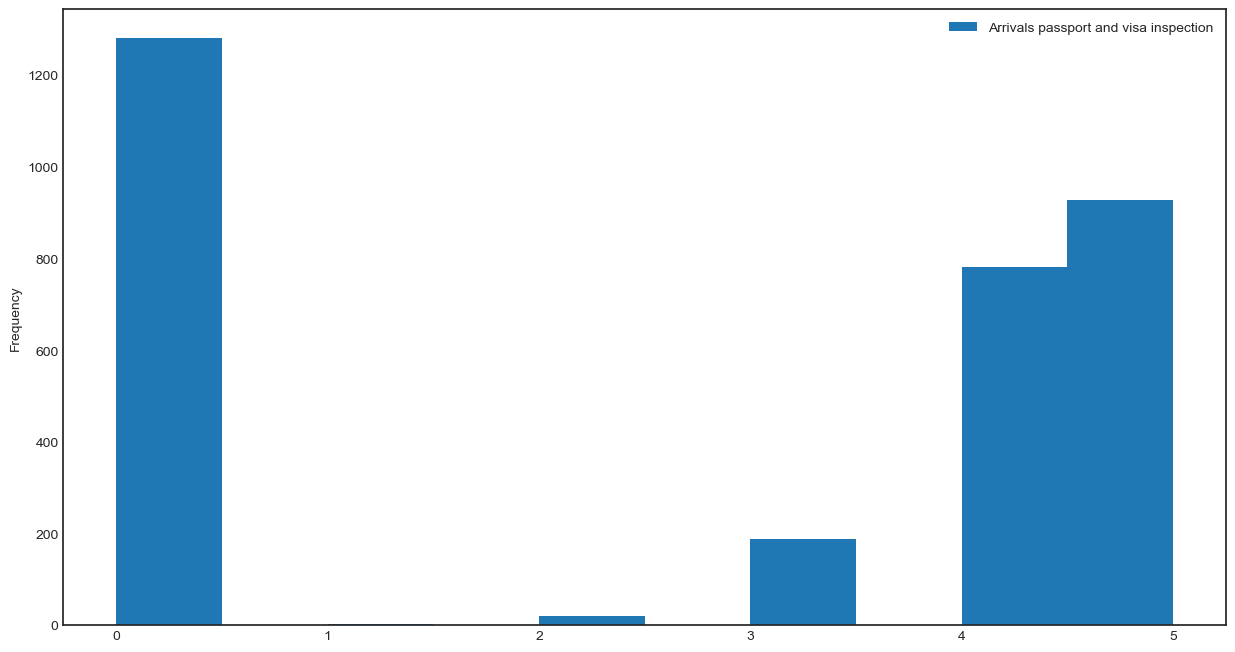

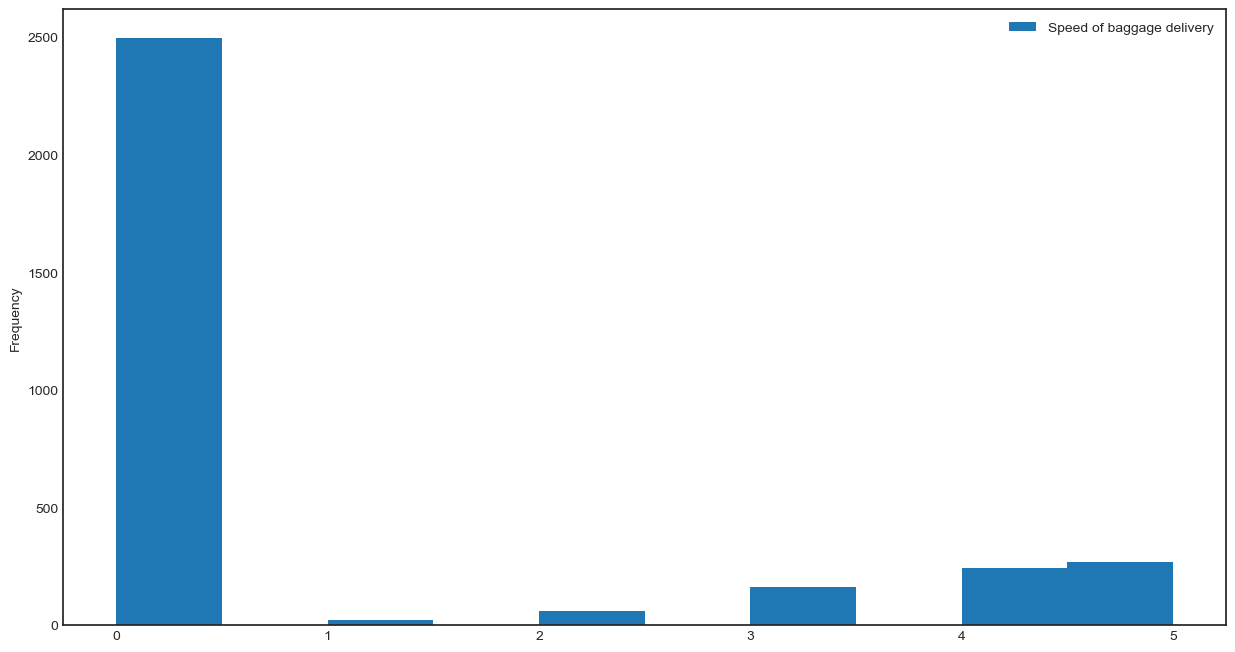

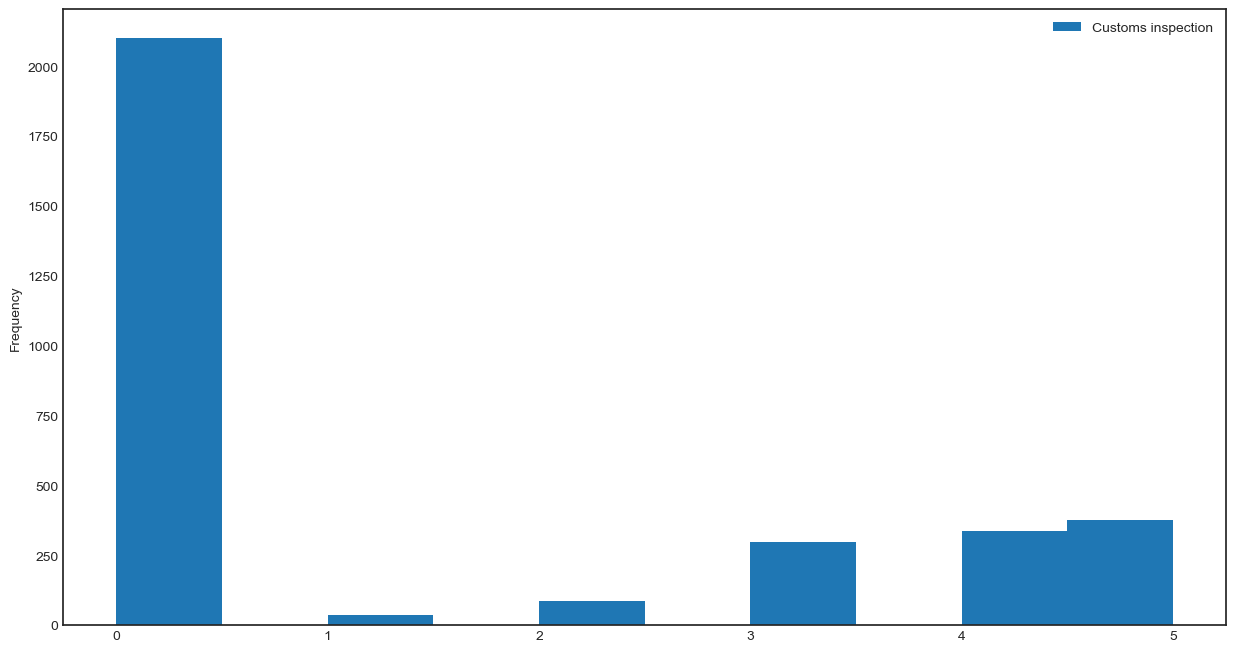

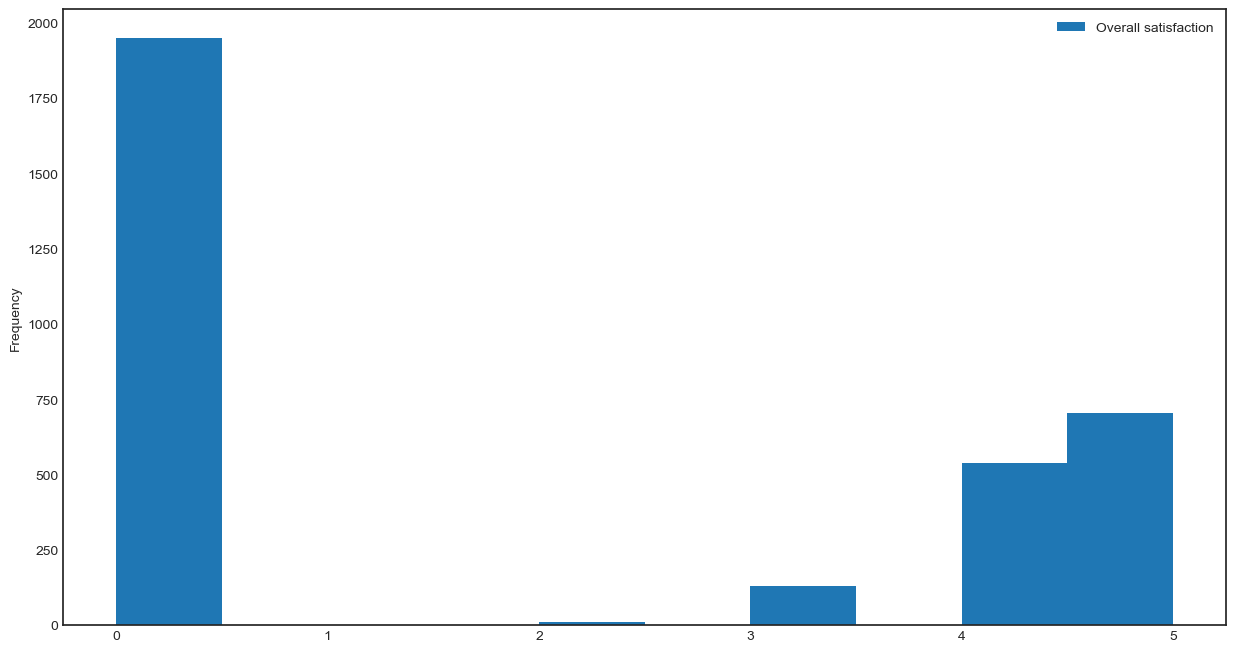


 
 Modified data set 

Quarter                                         0
Date recorded                                   0
Departure time                                  0
Ground transportation to/from airport           0
Parking facilities                              0
Parking facilities (value for money)            0
Availability of baggage carts                   0
Efficiency of check-in staff                    0
Check-in wait time                              0
Courtesy of of check-in staff                   0
Wait time at passport inspection                0
Courtesy of inspection staff                    0
Courtesy of security staff                      0
Thoroughness of security inspection             0
Wait time of security inspection                0
Feeling of safety and security                  0
Ease of finding your way through the airport    0
Flight information screens                      0
Walking distance inside terminal                0
Ease of making connections

In [27]:
#Take a look at the variables with missing values
#create histograms
#remove variables we do not want to plot with a histogram
columns_to_see = airport_satisfaction.columns
columns_to_see = list(columns_to_see)
columns_remove = ['Quarter','Date recorded','Departure time']
a = [columns_to_see.remove(x) for x in columns_remove]

for i in columns_to_see:
    plt.figure(figsize=(15,8))
    airport_satisfaction[i].plot.hist(legend=True) 
    plt.show()

#Impute the mode
for i in columns_to_see:
    airport_satisfaction[i] = airport_satisfaction[i].fillna(airport_satisfaction[i].mode()[0])

print("\n \n Modified data set \n")
print(airport_satisfaction.isnull().sum(axis=0))

#create a new column which will state if a customer is satisfied with the airport features
def label_satisfaction(row):
    if(row['Overall satisfaction'] in [0,1,2,3]):
        return('not satisfied')
    else:
        return('satisfied')
#use the function to create a new column with the satisfaction
airport_satisfaction['satisfied'] = airport_satisfaction.apply (lambda row: label_satisfaction(row), axis=1)

In [28]:
#get the frequency of each class by the satisfied variable
airport_satisfaction['satisfied'].value_counts()

not satisfied    2088
satisfied        1241
Name: satisfied, dtype: int64

In [29]:
#get the set description to validate data types per feature
airport_satisfaction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3329 entries, 0 to 3500
Data columns (total 38 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Quarter                                       3329 non-null   object 
 1   Date recorded                                 3329 non-null   object 
 2   Departure time                                3329 non-null   object 
 3   Ground transportation to/from airport         3329 non-null   float64
 4   Parking facilities                            3329 non-null   float64
 5   Parking facilities (value for money)          3329 non-null   float64
 6   Availability of baggage carts                 3329 non-null   float64
 7   Efficiency of check-in staff                  3329 non-null   float64
 8   Check-in wait time                            3329 non-null   float64
 9   Courtesy of of check-in staff                 3329 non-null   f

## Data Visualizations

Text(0.5, 0.98, 'Histogram for Column Variables with Star Ratings')

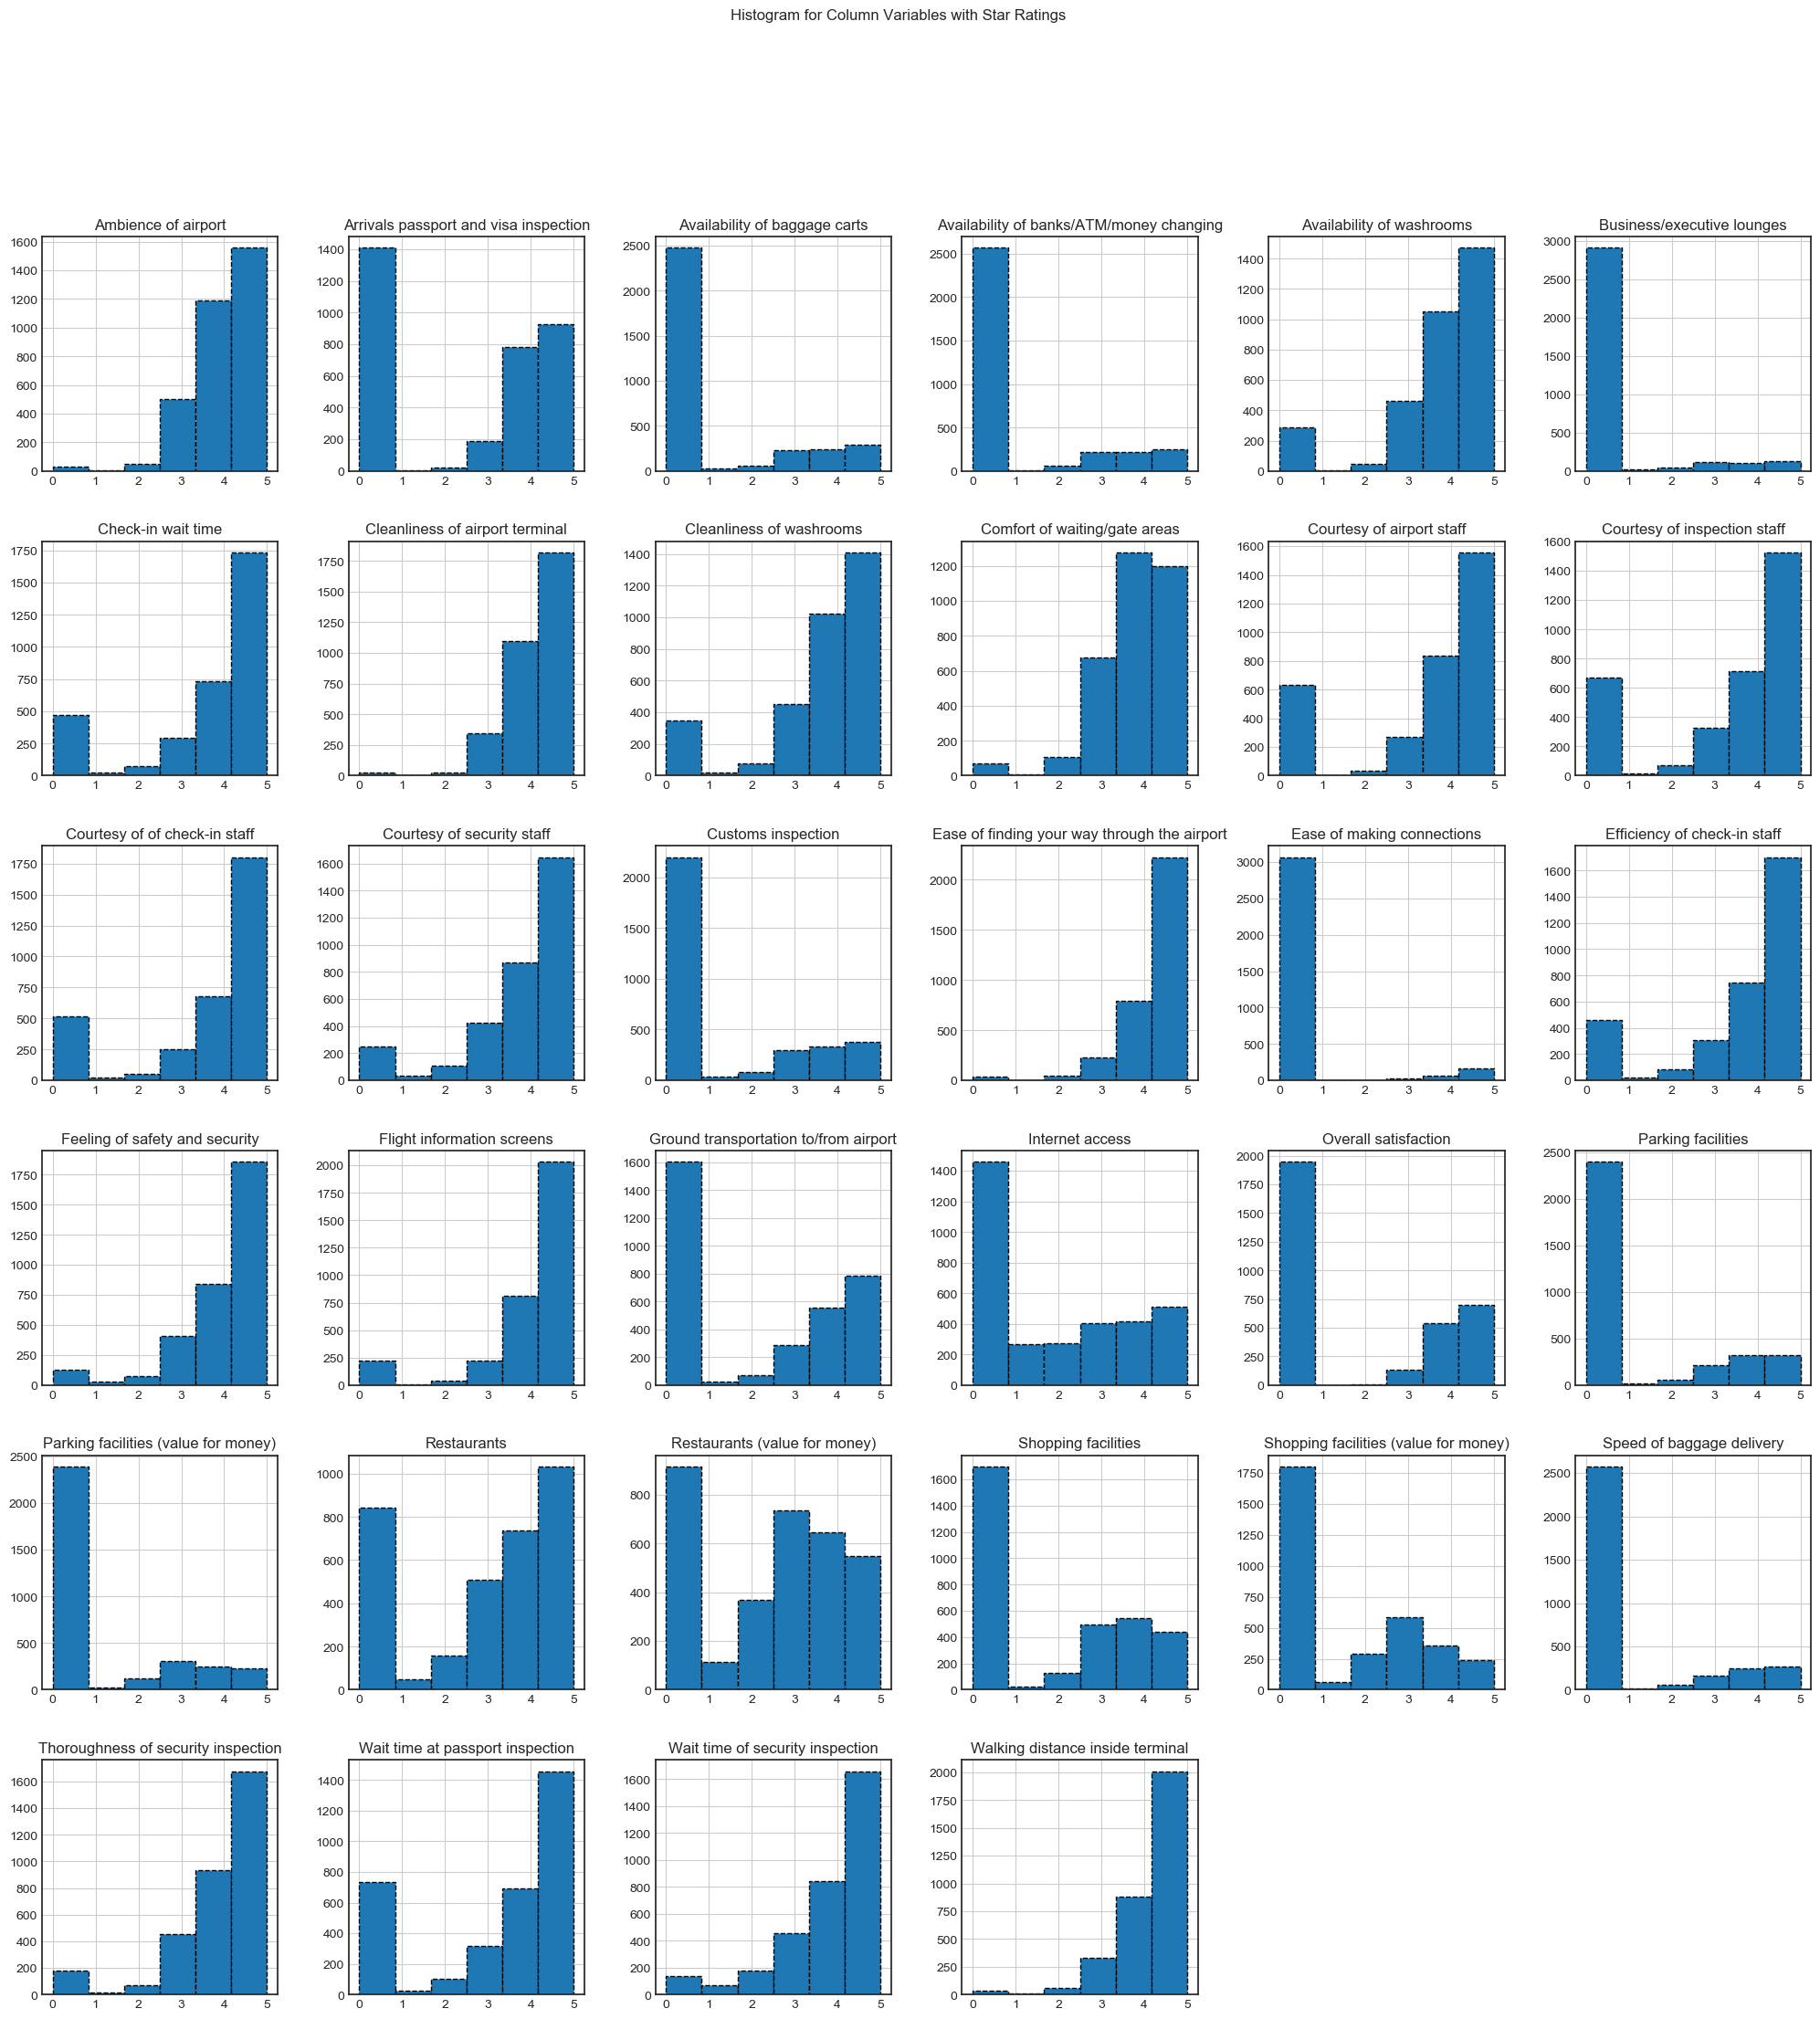

In [30]:
#Histogram plot to show the 5 star ratings in all satisfaction-determining attributes 
df_new_1 = airport_satisfaction.iloc[:,3:37]
df_new_1
#creating histogram to show the distribution of numerical variables and the 5 star ratings 
df_new_1.hist(bins=6, figsize=(25, 25), linestyle='dashed', histtype='bar', ec='black')
plt.suptitle("Histogram for Column Variables with Star Ratings")
#plt.hist(df_new_1, bins='auto')



In [31]:
#presenting numerically the correlation score between satisfaction and other input variables to see what variables have had a greater impact
#and to see their general relationsip with the target variables

df_new_1.drop("Overall satisfaction", axis=1).apply(lambda x: x.corr(df_new_1["Overall satisfaction"]))



Ground transportation to/from airport          -0.014919
Parking facilities                              0.006306
Parking facilities (value for money)            0.017704
Availability of baggage carts                   0.012070
Efficiency of check-in staff                    0.072653
Check-in wait time                              0.061926
Courtesy of of check-in staff                   0.052286
Wait time at passport inspection                0.094178
Courtesy of inspection staff                    0.074165
Courtesy of security staff                      0.071371
Thoroughness of security inspection             0.064964
Wait time of security inspection                0.096904
Feeling of safety and security                  0.071428
Ease of finding your way through the airport    0.042013
Flight information screens                      0.035525
Walking distance inside terminal                0.074720
Ease of making connections                      0.150044
Courtesy of airport staff      

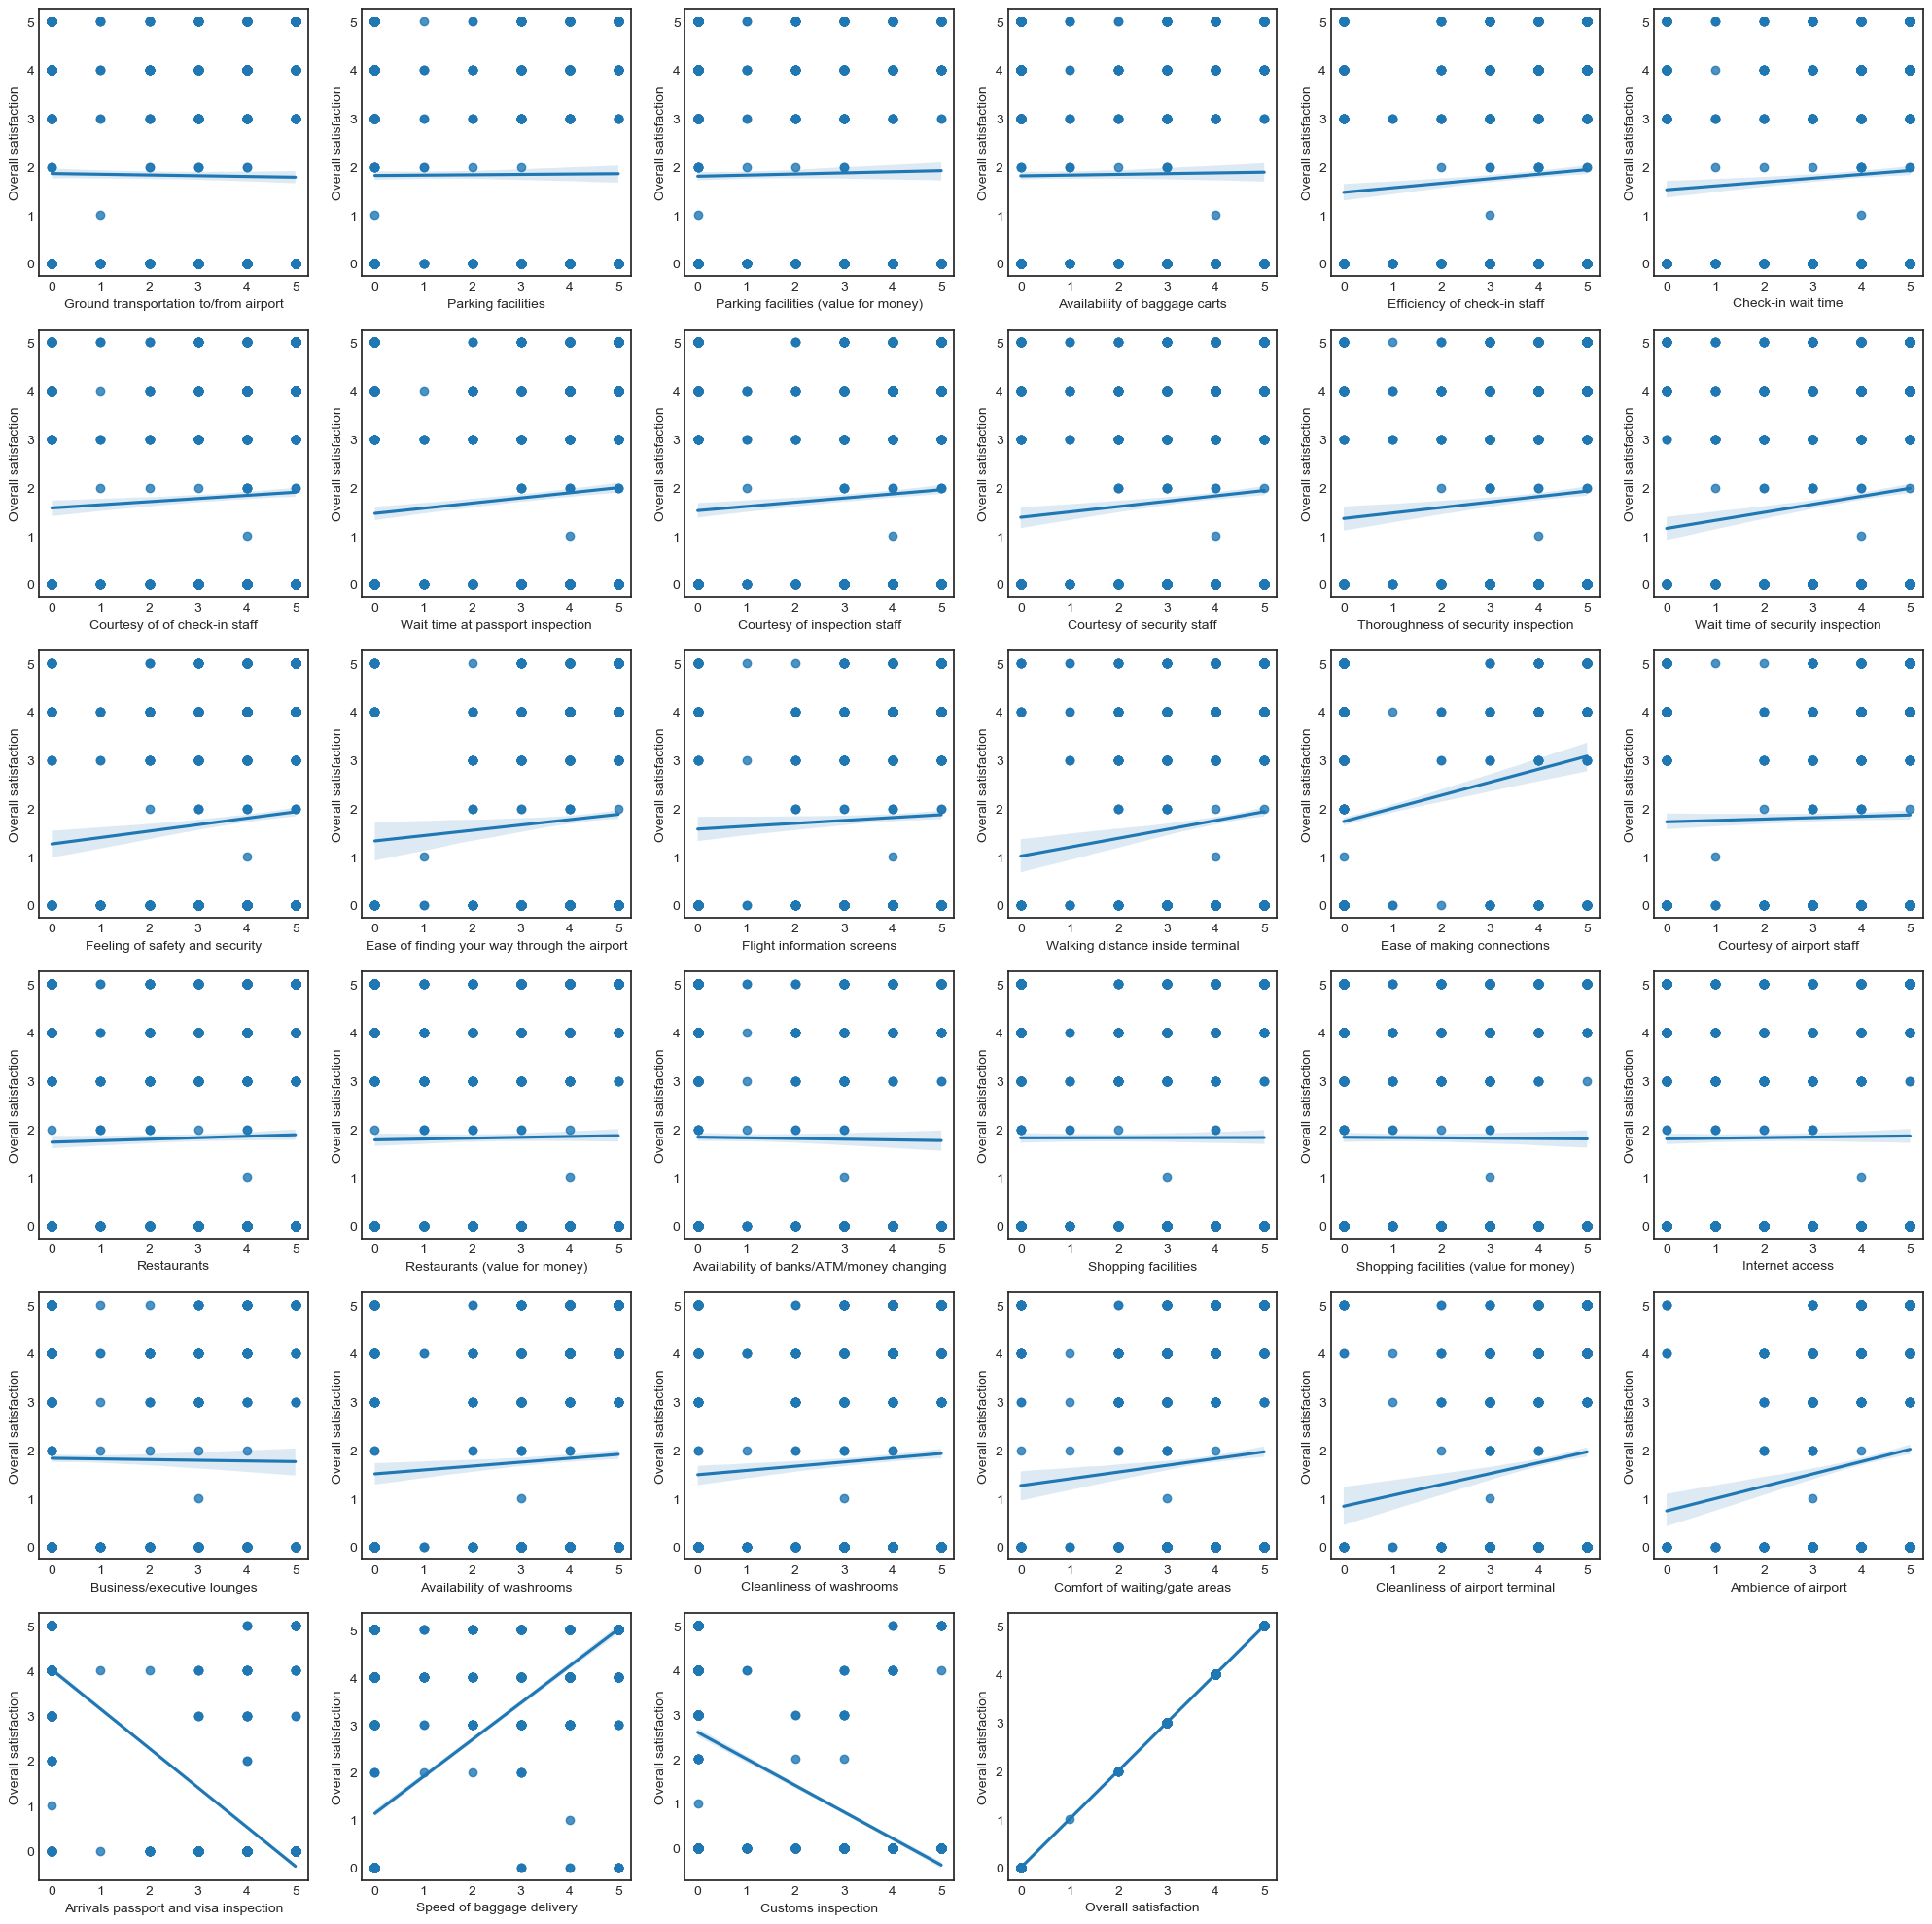

In [32]:
#making a regplot to see the corelation between the variables, the strength of one independent impact on target
#variable's variance as well as seeing direction of relationship between dependent and independent variables
count=1
plt.subplots(figsize=(25,25))
for i in df_new_1.columns:
    plt.subplot(6,6,count)
    sns.regplot(x=df_new_1[i], y=df_new_1["Overall satisfaction"])
    count+=1
plt.show()


## Converting categorical features to numeric

In [33]:
# Converting quarter column to numeric
le_quarter = LabelEncoder()
airport_satisfaction['Quarter'] = le_quarter.fit_transform(airport_satisfaction['Quarter'])

In [34]:
airport_satisfaction['Quarter']

0       9
1       9
2       9
3       9
4       9
       ..
3496    5
3497    5
3498    5
3499    5
3500    5
Name: Quarter, Length: 3329, dtype: int64

In [35]:
# Converting satisfied column to numeric
le_satisfied = LabelEncoder()
airport_satisfaction['satisfied'] = le_satisfied.fit_transform(airport_satisfaction['satisfied'])

In [36]:
airport_satisfaction['satisfied']

0       1
1       1
2       1
3       1
4       1
       ..
3496    1
3497    1
3498    1
3499    1
3500    1
Name: satisfied, Length: 3329, dtype: int64

## Feature Selection and Classification Trial

In [37]:
# Splitting into features and output column and into training and testing sets.
X = airport_satisfaction.loc[:,[x for x in airport_satisfaction.columns if x not in ['Date recorded','Departure time','satisfied']]]
y = airport_satisfaction['satisfied']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

Selecting the best features for the classification and displaying the selected features.

In [38]:
from sklearn.naive_bayes import GaussianNB
# Defining SequentialFeatureSelector with given parameters and fitting on data to get selected columns.
gnb_for_sfs = GaussianNB()
sfs = SequentialFeatureSelector(gnb_for_sfs,n_features_to_select = 7,direction = 'forward',scoring = 'neg_mean_squared_error',
                               cv = 10)
sfs.fit(X,y)
print(X.columns[sfs.get_support()])

Index(['Wait time at passport inspection', 'Walking distance inside terminal',
       'Ease of making connections', 'Cleanliness of airport terminal',
       'Ambience of airport', 'Speed of baggage delivery',
       'Overall satisfaction'],
      dtype='object')


In [39]:
# Classifying the classes with the selected features and evaluating using the classification report.
nb_model = GaussianNB()
nb_model.fit(X_train[['Wait time at passport inspection', 'Walking distance inside terminal',
       'Ease of making connections', 'Cleanliness of airport terminal',
       'Ambience of airport', 'Speed of baggage delivery',
       'Overall satisfaction']], y_train)
y_pred = nb_model.predict(X_test[['Wait time at passport inspection', 'Walking distance inside terminal',
       'Ease of making connections', 'Cleanliness of airport terminal',
       'Ambience of airport', 'Speed of baggage delivery',
       'Overall satisfaction']])

print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       389
           1       1.00      0.95      0.97       277

    accuracy                           0.98       666
   macro avg       0.98      0.97      0.98       666
weighted avg       0.98      0.98      0.98       666



In [ ]:
#Add 2 more 